# Problem Statement:
#### Financial threats are displaying a trend about the credit risk of commercial banks as the incredible improvement in the financial industry has arisen. In this way, one of the biggest threats faces by commercial banks is the risk prediction of credit clients. The goal is to predict the probability of credit default based on credit card owner's characteristics and payment history.

### Importing the required libraries. 

In [1]:
# Importing all libraries
from pandas import read_csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Importing the dataset.

In [2]:
customer_data = read_csv("UCI_Credit_Card.csv")

In [3]:
customer_data.head(5)

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0       0.0       0.0       0.0                           1  
1    1000.0       0.0    2000.0                           1  
2    1000.0    1000.0    5000.0                           0  
3    1100.0    1069.0    1000.0                           0  
4    9000.0     689.0     679.0                           0  

[5 rows x 25 columns]

### description about the dataset 

In [4]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

#### The 'ID' column is removed from the dataset as it lacks any meaningful information or contribution to the model. 

In [5]:
# Drop the 'ID' column
customer_data = customer_data.drop('ID', axis=1)

### Checking for null values

In [6]:
customer_data.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

### Checking for the duplicates

In [7]:
# Checking dupliacte values
customer_data[customer_data.duplicated()]

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
1980    150000.0    2          1         1   38      1     -2     -2     -2   
4585    150000.0    2          1         1   31      1     -2     -2     -2   
6022    210000.0    2          1         2   39      1     -2     -2     -2   
6466    210000.0    2          2         1   49      1     -2     -2     -2   
7319    500000.0    1          1         1   43      1     -2     -2     -2   
8320    360000.0    1          2         1   41      1     -2     -2     -2   
10250    50000.0    1          2         2   26      1     -2     -2     -2   
13106   360000.0    2          1         1   49      1     -2     -2     -2   
14294    20000.0    1          2         2   24      2      2      4      4   
15458   160000.0    1          2         2   28     -2     -2     -2     -2   
15617   200000.0    2          2         2   26     -2     -2     -2     -2   
15685   360000.0    1          1         2   29      1     -2     -2     -2   
17032    50000.0    2          1         2   23      1     -2     -2     -2   
19114    80000.0    2          2         1   31     -2     -2     -2     -2   
19487   180000.0    2          1         2   28      1     -2     -2     -2   
19604   110000.0    2          1         2   31      1     -2     -2     -2   
19897   100000.0    2          2         1   49      1     -2     -2     -2   
20875   230000.0    1          1         1   39     -1     -1     -1     -1   
21881   160000.0    2          3         2   26     -1     -1     -1     -1   
22162   360000.0    2          1         2   29      1     -2     -2     -2   
23877   200000.0    1          1         2   30     -2     -2     -2     -2   
24122   140000.0    1          1         2   29      1     -2     -2     -2   
25608   360000.0    2          1         1   41     -2     -2     -2     -2   
26249    90000.0    2          1         2   31      1     -2     -2     -2   
26805   300000.0    1          1         2   27     -2     -2     -2     -2   
27351   210000.0    1          2         1   39     -1     -1     -1     -1   
27765    80000.0    2          2         2   25     -2     -2     -2     -2   
27928   150000.0    2          1         2   28      1     -2     -2     -2   
27966   360000.0    2          1         2   27      1     -2     -2     -2   
28228   200000.0    2          1         1   34      1     -2     -2     -2   
28779   200000.0    2          1         1   36      1     -2     -2     -2   
28983    80000.0    2          3         1   42     -2     -2     -2     -2   
29265   180000.0    1          2         1   26     -1     -1     -1     -1   
29823   220000.0    1          1         1   42      1     -2     -2     -2   
29909   360000.0    1          1         2   32     -2     -2     -2     -2   

       PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
1980      -2  ...        0.0        0.0        0.0       0.0       0.0   
4585      -2  ...        0.0        0.0        0.0       0.0       0.0   
6022      -2  ...        0.0        0.0        0.0       0.0       0.0   
6466      -2  ...        0.0        0.0        0.0       0.0       0.0   
7319      -2  ...        0.0        0.0        0.0       0.0       0.0   
8320      -2  ...        0.0        0.0        0.0       0.0       0.0   
10250     -2  ...        0.0        0.0        0.0       0.0       0.0   
13106     -2  ...        0.0        0.0        0.0       0.0       0.0   
14294      4  ...     1650.0     1650.0     1650.0       0.0       0.0   
15458     -2  ...        0.0        0.0        0.0       0.0       0.0   
15617     -2  ...        0.0        0.0        0.0       0.0       0.0   
15685     -2  ...        0.0        0.0        0.0       0.0       0.0   
17032     -2  ...        0.0        0.0        0.0       0.0       0.0   
19114     -2  ...        0.0        0.0        0.0       0.0       0.0   
19487     -2  ...        0.0        0.0        0.0  

### Remove the duplicates 

In [8]:
customer_data = customer_data.drop_duplicates()

In [9]:
# Checking dupliacte values
customer_data[customer_data.duplicated()]

Empty DataFrame
Columns: [LIMIT_BAL, SEX, EDUCATION, MARRIAGE, AGE, PAY_0, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6, BILL_AMT1, BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5, BILL_AMT6, PAY_AMT1, PAY_AMT2, PAY_AMT3, PAY_AMT4, PAY_AMT5, PAY_AMT6, default.payment.next.month]
Index: []

[0 rows x 24 columns]

# Data visualization 

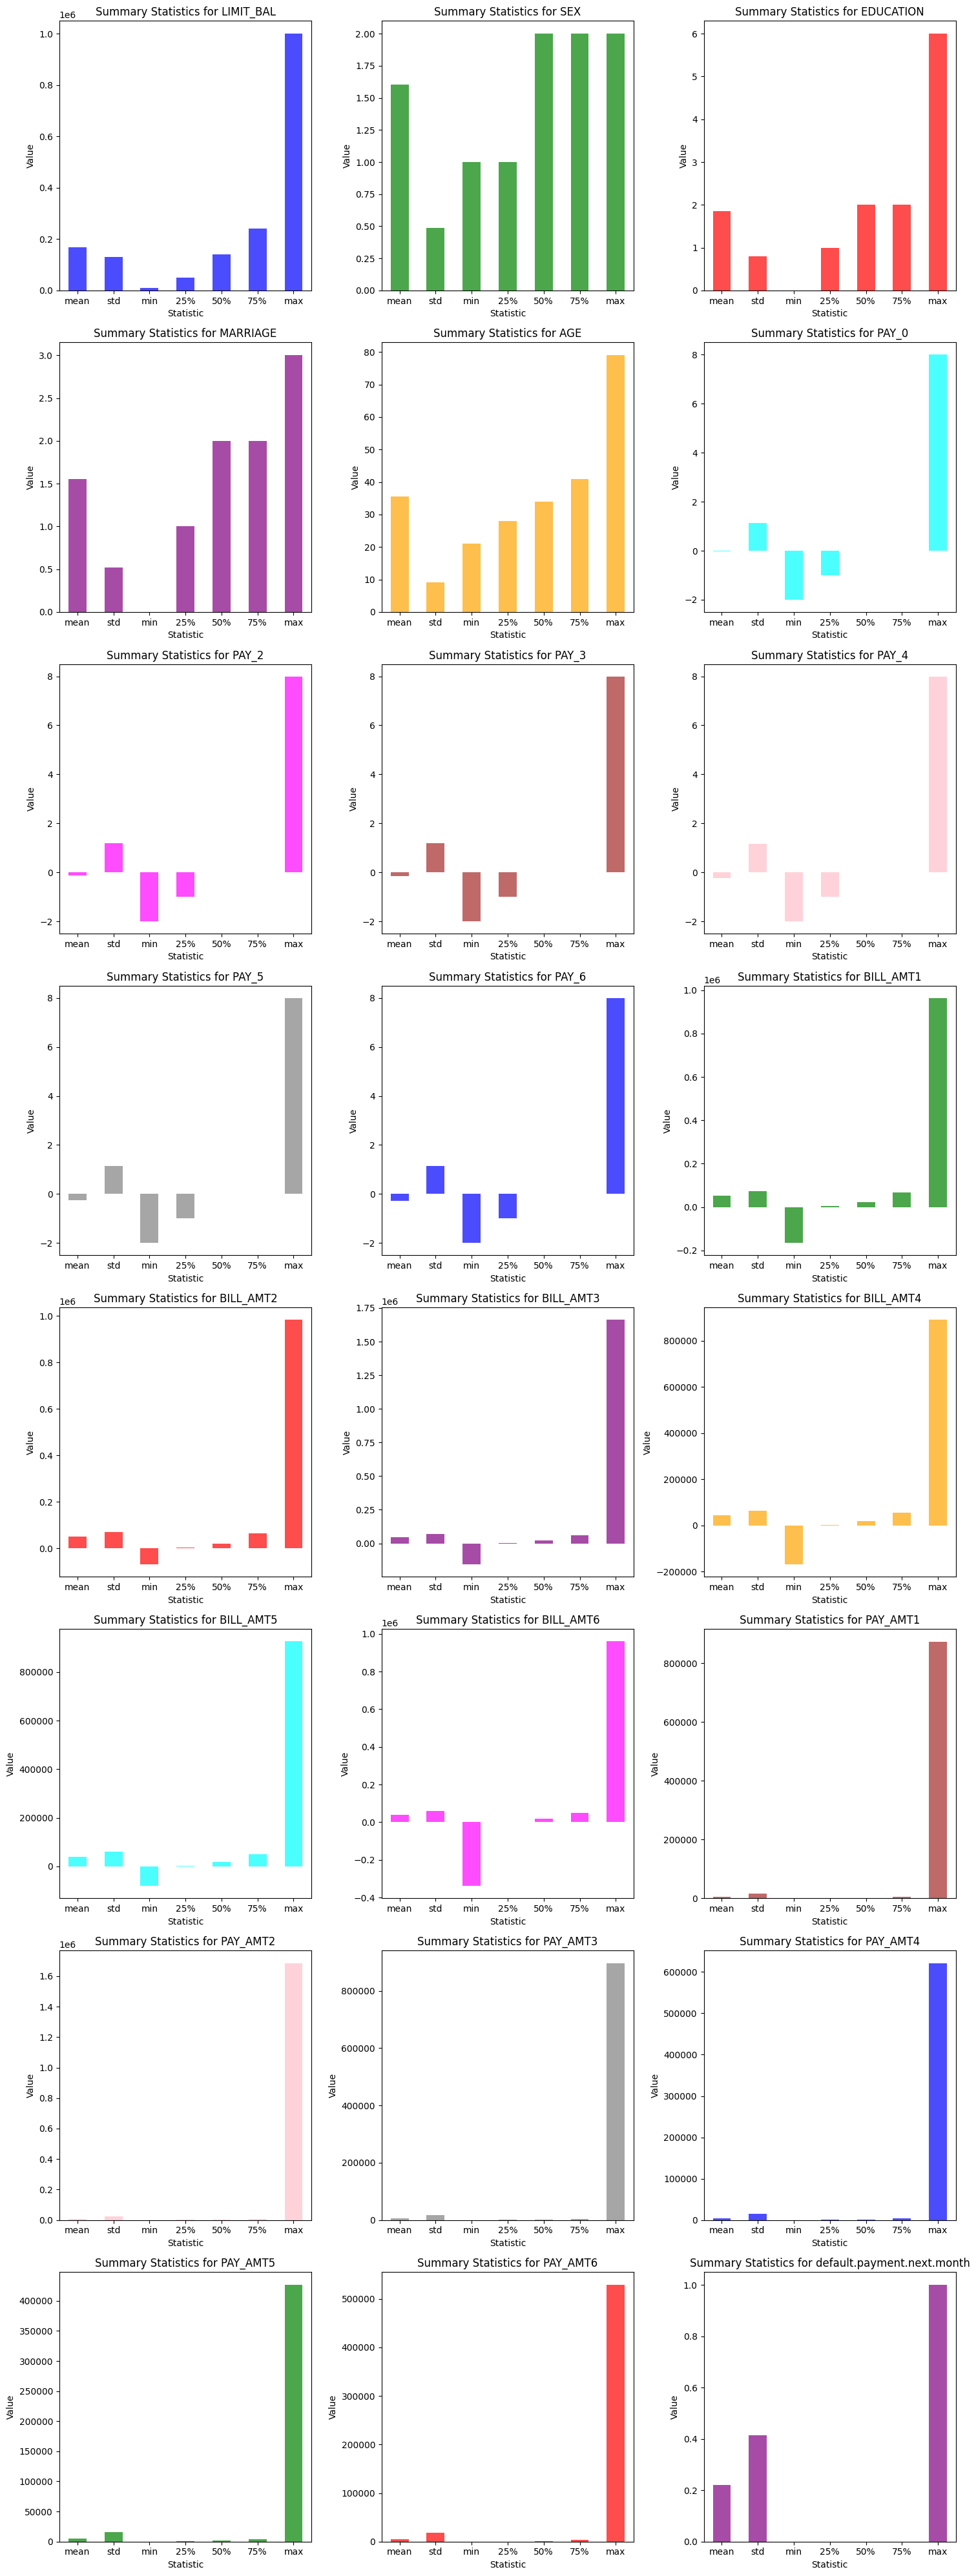

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have a DataFrame named 'customer_data'
# Replace 'customer_data' with the actual name of your DataFrame

# Generate the summary statistics
summary = customer_data.describe()

# Transpose the summary statistics so that columns become rows
summary = summary.transpose()

# Drop the "count" column
summary = summary.drop("count", axis=1)

# Define a list of colors for the bar plots
bar_colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan', 'magenta', 'brown', 'pink', 'gray']

# Create bar plots for each column with different colors and arrange them in 3 columns
num_columns = 3  # Number of columns for the subplots
num_rows = -(-len(summary) // num_columns)  # Calculate the number of rows needed

# Create a single image to store all the plots
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 5 * num_rows))

for i, column in enumerate(summary.index):
    row = i // num_columns
    col = i % num_columns
    ax = axes[row, col]

    color_index = i % len(bar_colors)
    color = bar_colors[color_index]

    summary.loc[column].plot(kind='bar', color=color, alpha=0.7, ax=ax)
    ax.set_title(f'Summary Statistics for {column}')
    ax.set_ylabel('Value')
    ax.set_xlabel('Statistic')
    ax.tick_params(axis='x', labelrotation=0)

# Remove any empty subplots
for i in range(len(summary), num_rows * num_columns):
    fig.delaxes(axes[i // num_columns, i % num_columns])

# Adjust layout and spacing
plt.tight_layout()

# Save all the plots as a single image
plt.savefig('summary_plots.png')

# Display the plots
plt.show()


# Exploratory Data Analysis

# Dependent Variable

In [11]:
#renaming columns 

customer_data.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
customer_data.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
customer_data.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)
customer_data.rename({'default.payment.next.month' : 'IsDefaulter'}, axis = 1, inplace=True)

In [12]:
customer_data.head(2)

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_SEPT  PAY_AUG  PAY_JUL  \
0    20000.0    2          2         1   24         2        2       -1   
1   120000.0    2          2         2   26        -1        2        0   

   PAY_JUN  PAY_MAY  ...  BILL_AMT_JUN  BILL_AMT_MAY  BILL_AMT_APR  \
0       -1       -2  ...           0.0           0.0           0.0   
1        0        0  ...        3272.0        3455.0        3261.0   

   PAY_AMT_SEPT  PAY_AMT_AUG  PAY_AMT_JUL  PAY_AMT_JUN  PAY_AMT_MAY  \
0           0.0        689.0          0.0          0.0          0.0   
1           0.0       1000.0       1000.0       1000.0          0.0   

   PAY_AMT_APR  IsDefaulter  
0          0.0            1  
1       2000.0            1  

[2 rows x 24 columns]

# Independent Categorical Variable

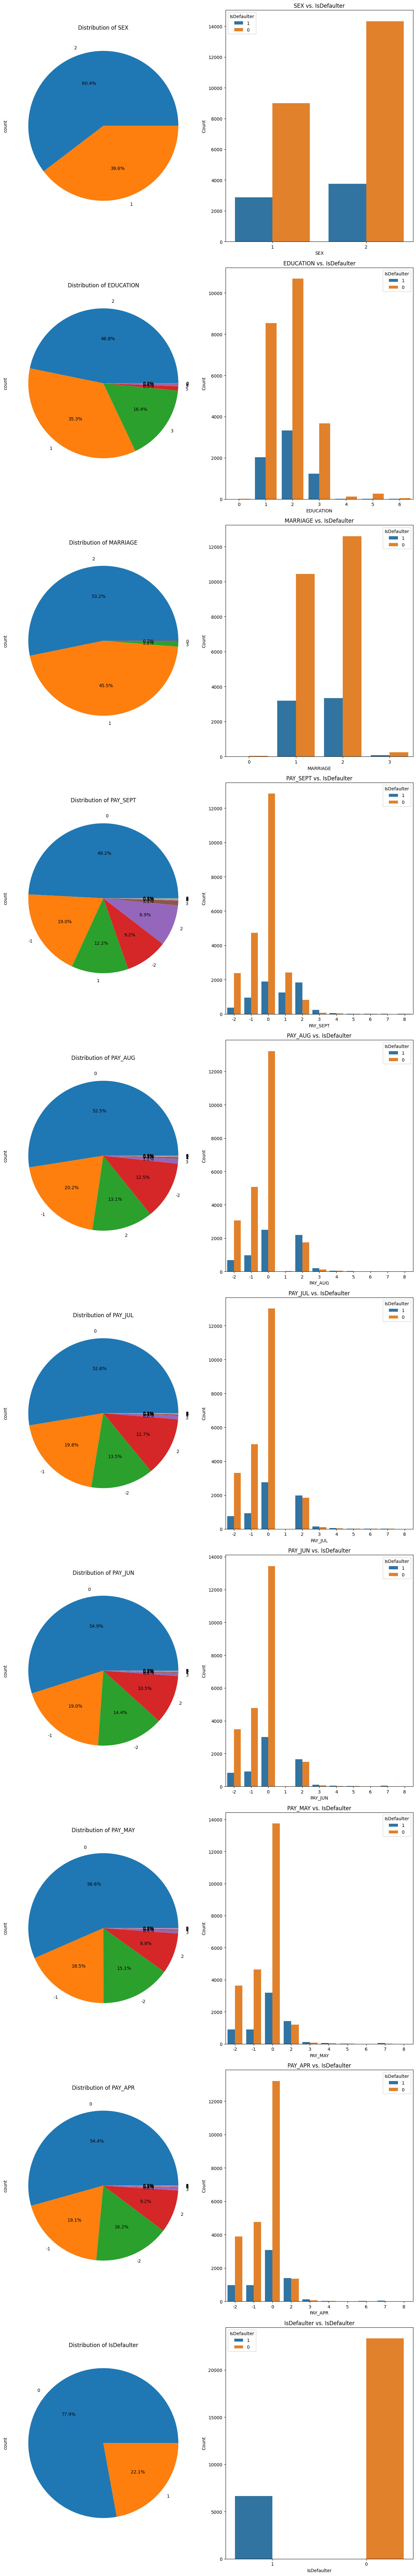

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame 'customer_data' containing your data

# List of categorical features
categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_SEPT', 'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR', 'IsDefaulter']

# Create a single figure for all plots
fig, axes = plt.subplots(nrows=len(categorical_features), ncols=2, figsize=(13, 8 * len(categorical_features)))

for i, col in enumerate(categorical_features):
    # Pie chart for the distribution of the categorical variable
    customer_data[col].value_counts().plot(kind="pie", ax=axes[i, 0], autopct='%1.1f%%')
    axes[i, 0].set_title(f'Distribution of {col}')

    # Convert 'IsDefaulter' to string (object) data type
    customer_data['IsDefaulter'] = customer_data['IsDefaulter'].astype(str)

    # Countplot for the categorical variable with respect to 'IsDefaulter'
    sns.countplot(x=col, hue='IsDefaulter', data=customer_data, ax=axes[i, 1])
    axes[i, 1].set_title(f'{col} vs. IsDefaulter')
    axes[i, 1].set_xlabel(col)
    axes[i, 1].set_ylabel('Count')

# Adjust the layout and spacing
plt.tight_layout()

# Save the plot as a single image
plt.savefig('categorical_plots.png')

# Display the plot (optional)
plt.show()


## Independent Continuous Variable 

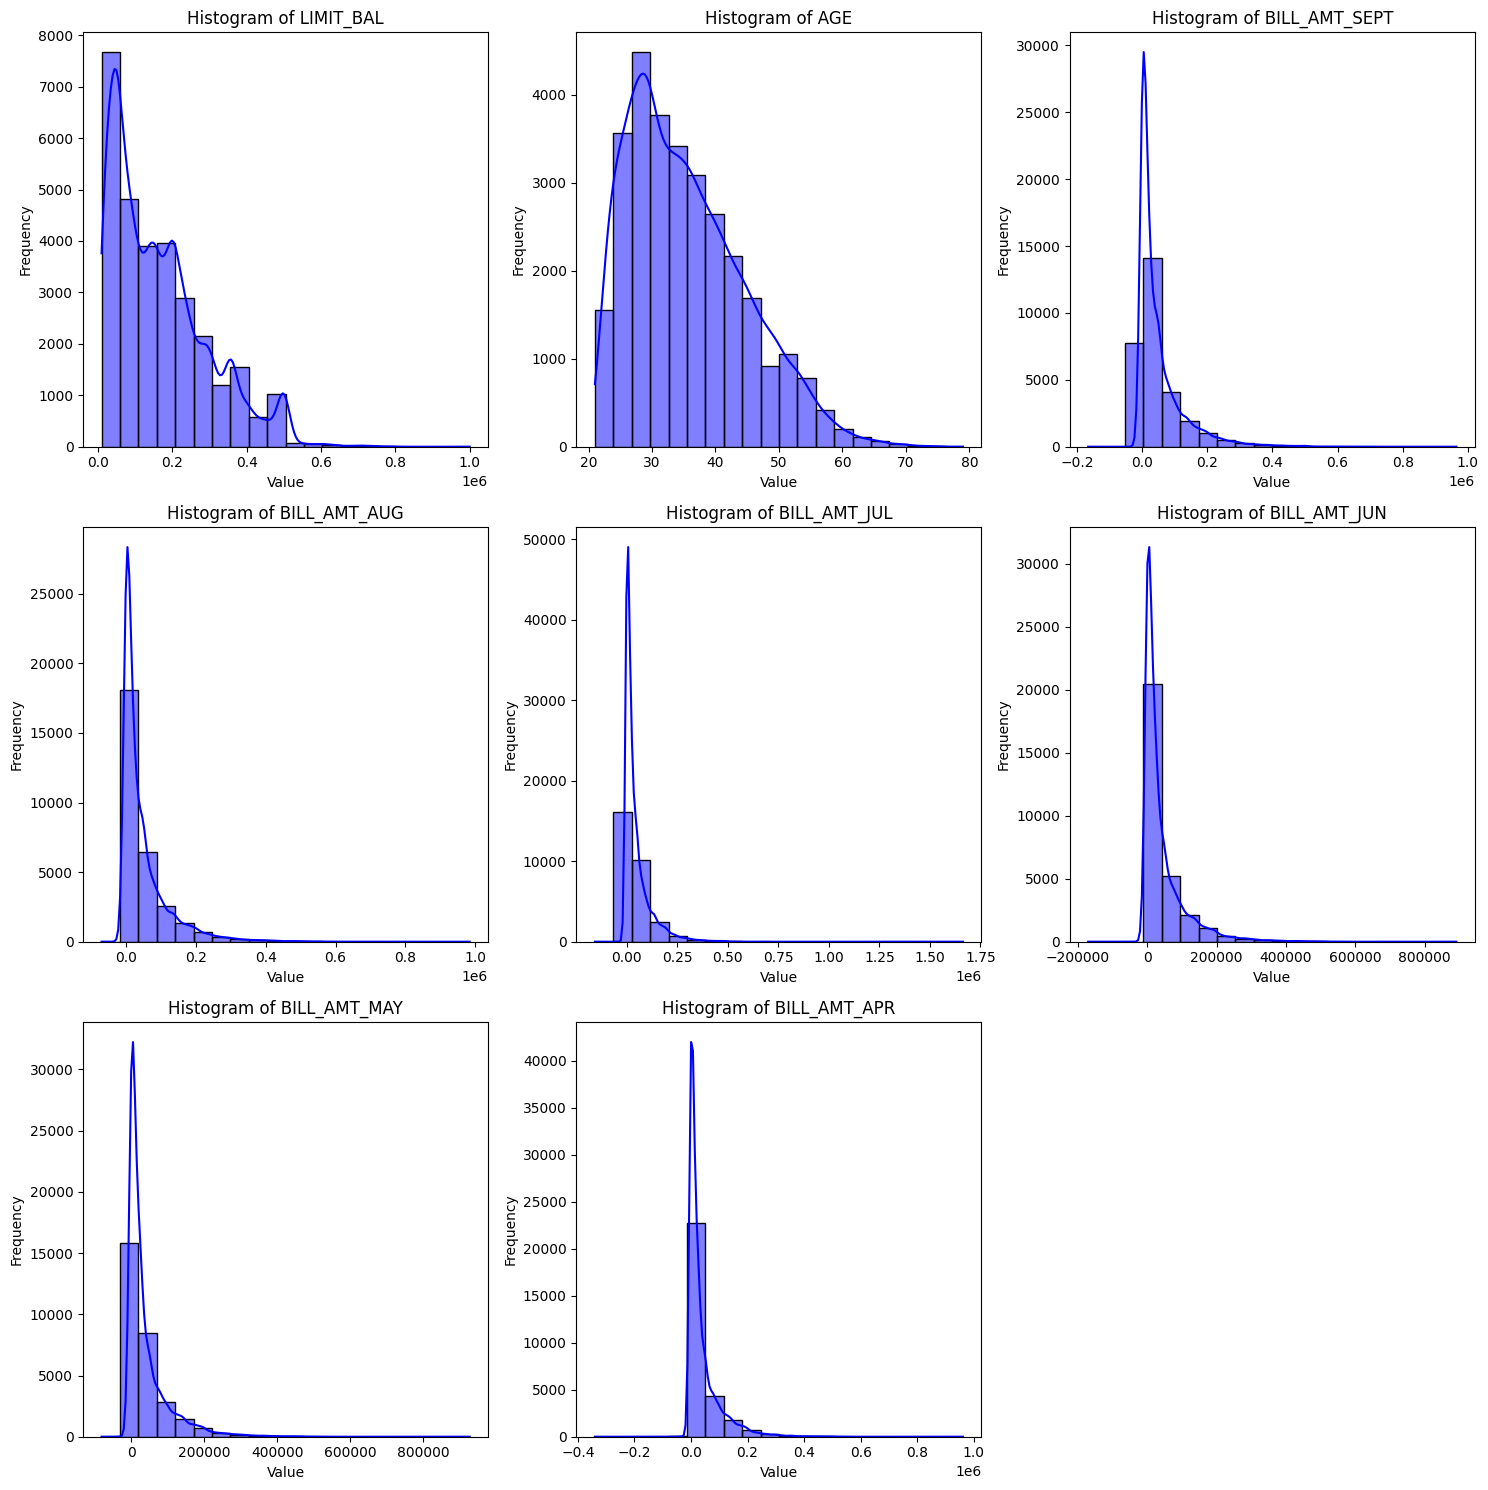

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# List of numeric columns to plot
selected_cols = ['LIMIT_BAL', 'AGE', 'BILL_AMT_SEPT',
       'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY',
       'BILL_AMT_APR']

# Calculate the number of rows and columns needed for subplots
n_cols = 3  # Number of columns in the grid
n_rows = (len(selected_cols) + 2) // n_cols  # Add 2 to ensure enough rows for the plots

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 15))

# Flatten the axes into a 1D array for easy iteration
axes = axes.flatten()

# Loop through the selected columns and create histograms with a KDE line
for i, column in enumerate(selected_cols):
    ax = axes[i]
    
    # Create a histogram with a KDE line
    sns.histplot(data=customer_data, x=column, kde=True, ax=ax, bins=20, color='blue', edgecolor='k')
    
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Histogram of {column}')
    
# Remove any empty subplots
for i in range(len(selected_cols), n_rows * n_cols):
    fig.delaxes(axes[i])

# Adjust the layout
plt.tight_layout()

# Save the figure as a single image
plt.savefig('histograms_with_kde.png', dpi=300, bbox_inches='tight')

# Show the figure
plt.show()


# Box Plots for the complete dataset.

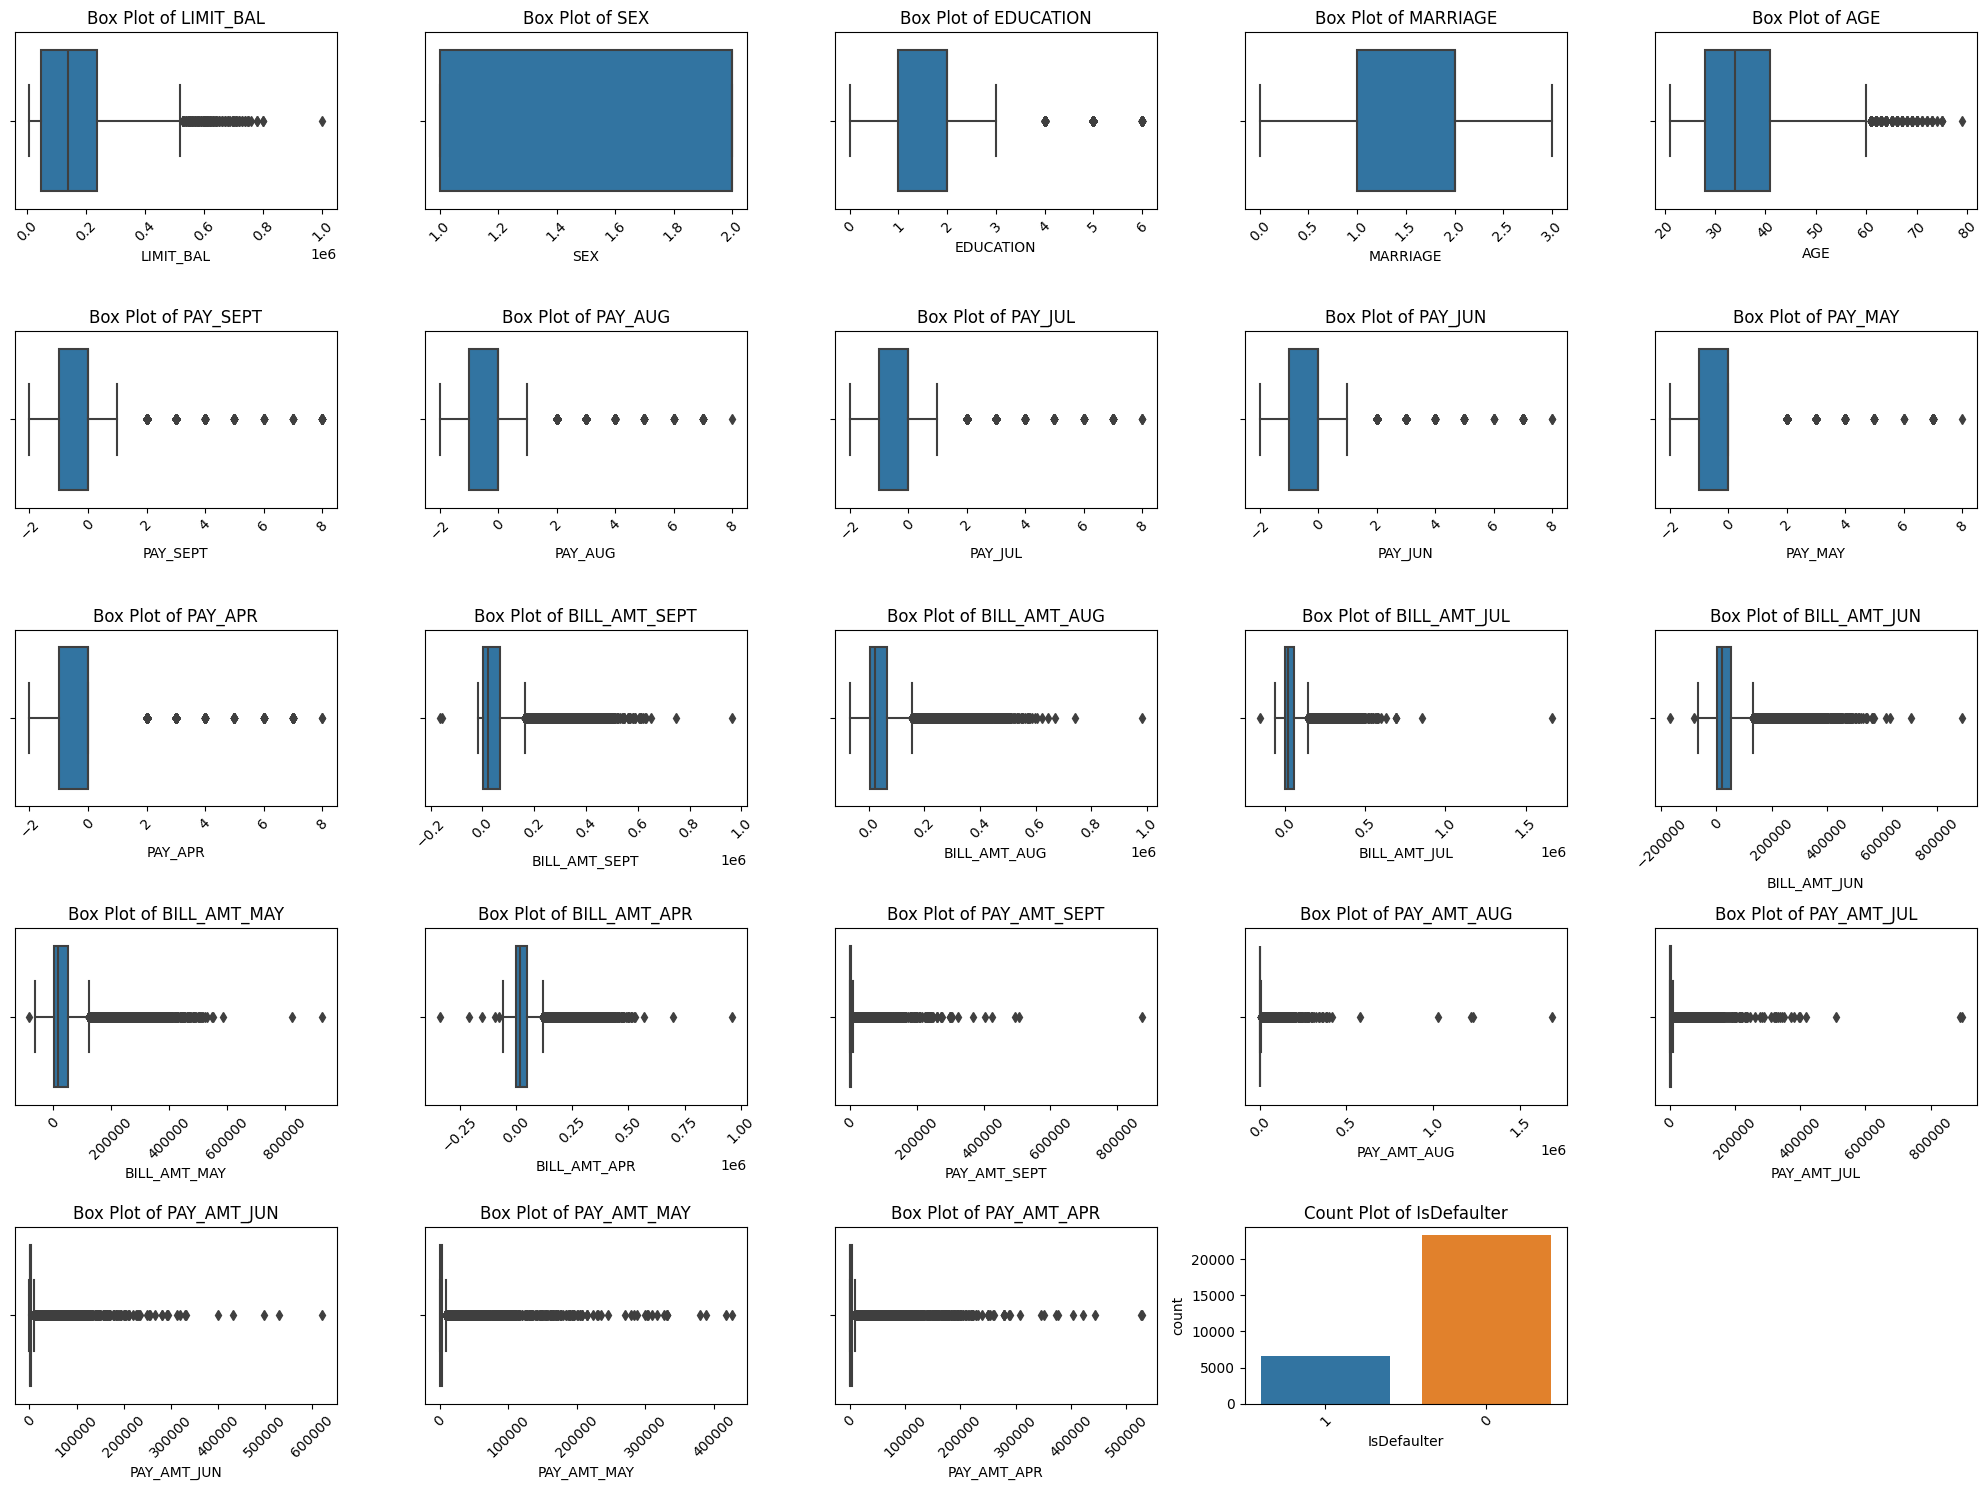

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of all columns
all_columns = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_SEPT',
       'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR', 'BILL_AMT_SEPT',
       'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY',
       'BILL_AMT_APR', 'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL',
       'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR', 'IsDefaulter']

# Calculate the number of rows and columns needed for subplots
n_cols = 5  # Number of columns in the grid
n_rows = (len(all_columns) + n_cols - 1) // n_cols

# Create subplots for box plots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 15))

# Create box plots for all variables
for i, column in enumerate(all_columns, 1):
    row = (i - 1) // n_cols
    col = (i - 1) % n_cols
    ax = axes[row, col]
    
    # Check the data type of the column
    if pd.api.types.is_numeric_dtype(customer_data[column]):
        # If the column is numeric, create a box plot
        sns.boxplot(data=customer_data, x=column, ax=ax)
    else:
        # If the column is not numeric, create a count plot (bar plot) for categorical data
        sns.countplot(data=customer_data, x=column, ax=ax)
    
    ax.set_title(f'Box Plot of {column}' if pd.api.types.is_numeric_dtype(customer_data[column]) else f'Count Plot of {column}')
    ax.set_xlabel(column)
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better visibility if needed

# Remove any empty subplots
for i in range(len(all_columns), n_rows * n_cols):
    row = i // n_cols
    col = i % n_cols
    fig.delaxes(axes[row, col])

# Adjust the layout
plt.tight_layout()

# Save the figure as a single image
plt.savefig('box_plots.png', dpi=300, bbox_inches='tight')

# Show the figure
plt.show()


# Z-score for the complete dataset.

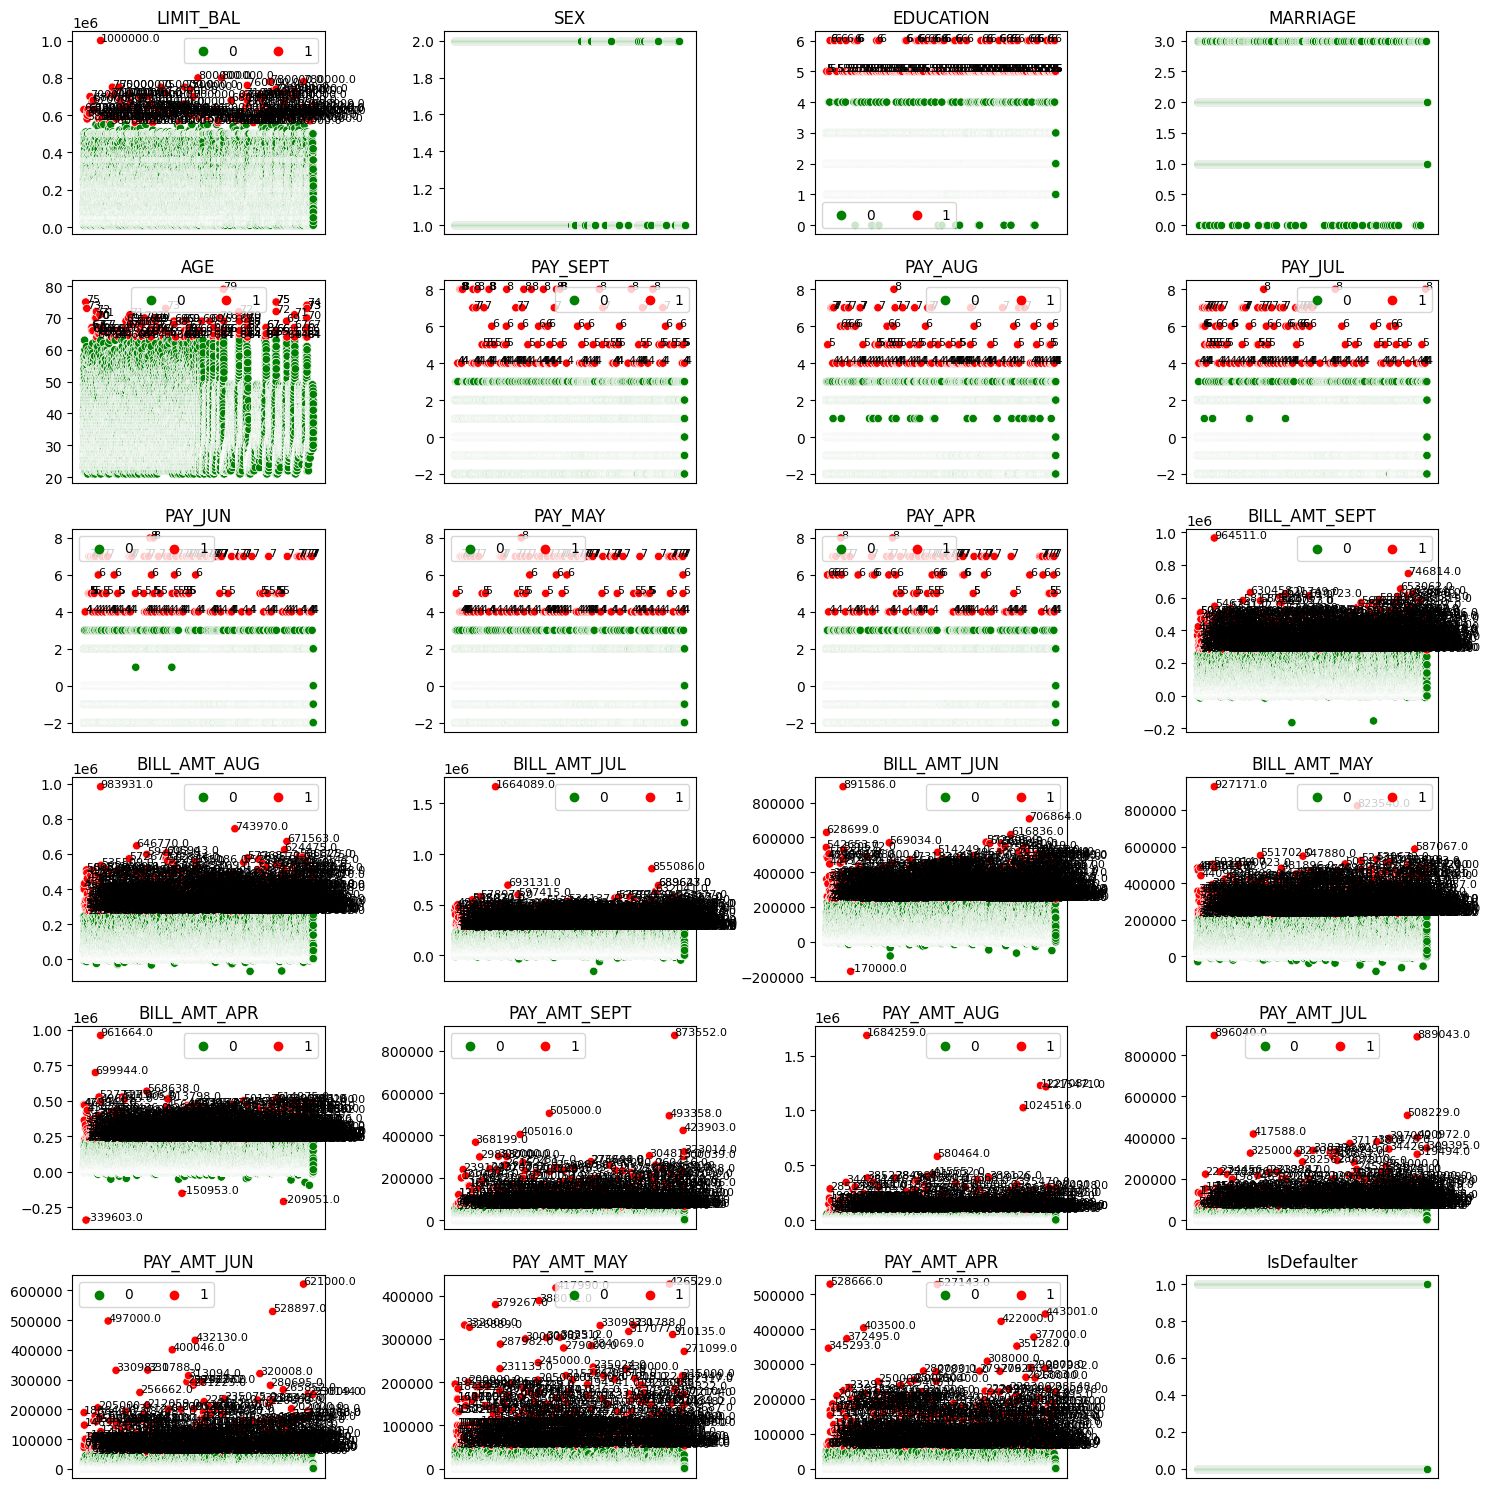

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns to convert to numeric (replace with your actual column names)
columns_to_convert = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_SEPT',
       'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR', 'BILL_AMT_SEPT',
       'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY',
       'BILL_AMT_APR', 'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL',
       'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR', 'IsDefaulter']

# Convert selected columns to numeric (handle non-numeric values as NaN)
for column in columns_to_convert:
    customer_data[column] = pd.to_numeric(customer_data[column], errors='coerce')

# Define the function for Z-score-based outlier detection
def zscore_outlier(x, lb, ub):
    zscore = ((x - x.mean()) / x.std()).copy()
    result_ = pd.Series([0] * len(x))
    result_[((zscore < lb) | (zscore > ub))] = 1
    return result_

# Calculate the number of rows and columns needed for subplots
n_cols = 4  # Number of columns in the grid
n_rows = (len(columns_to_convert) + n_cols - 1) // n_cols

# Create subplots for scatter plots
fig, ax = plt.subplots(n_rows, n_cols, figsize=(15, 15))

# Loop through each numeric column
for n, column in enumerate(columns_to_convert):
    row = n // n_cols
    col = n % n_cols

    # Reset the index of the customer_data[column] Series
    x = customer_data[column].reset_index(drop=True)

    # Apply the Z-score-based outlier detection function
    outliers = zscore_outlier(x, -3, 3)

    # Create scatter plots
    if sum(outliers) == 0:
        sns.scatterplot(x=np.arange(len(x)), y=x, ax=ax[row, col], legend=False, color='green')
    else:
        sns.scatterplot(x=np.arange(len(x)), y=x, ax=ax[row, col], hue=outliers, palette=['green', 'red'])

    for x, y in zip(np.arange(len(x))[outliers == 1], x[outliers == 1]):
        ax[row, col].text(x=x, y=y, s=y, fontsize=8)

    ax[row, col].set_ylabel("")
    ax[row, col].set_title(column)
    ax[row, col].xaxis.set_visible(False)

    if sum(outliers) > 0:
        ax[row, col].legend(ncol=2)

# Remove any empty subplots
for n in range(len(columns_to_convert), n_rows * n_cols):
    row = n // n_cols
    col = n % n_cols
    fig.delaxes(ax[row, col])

# Adjust the layout
plt.tight_layout()

# Save the entire figure as an image
plt.savefig('outlier_plots.png')

# Show the figure
plt.show()


## Heatmap for Correlation. 

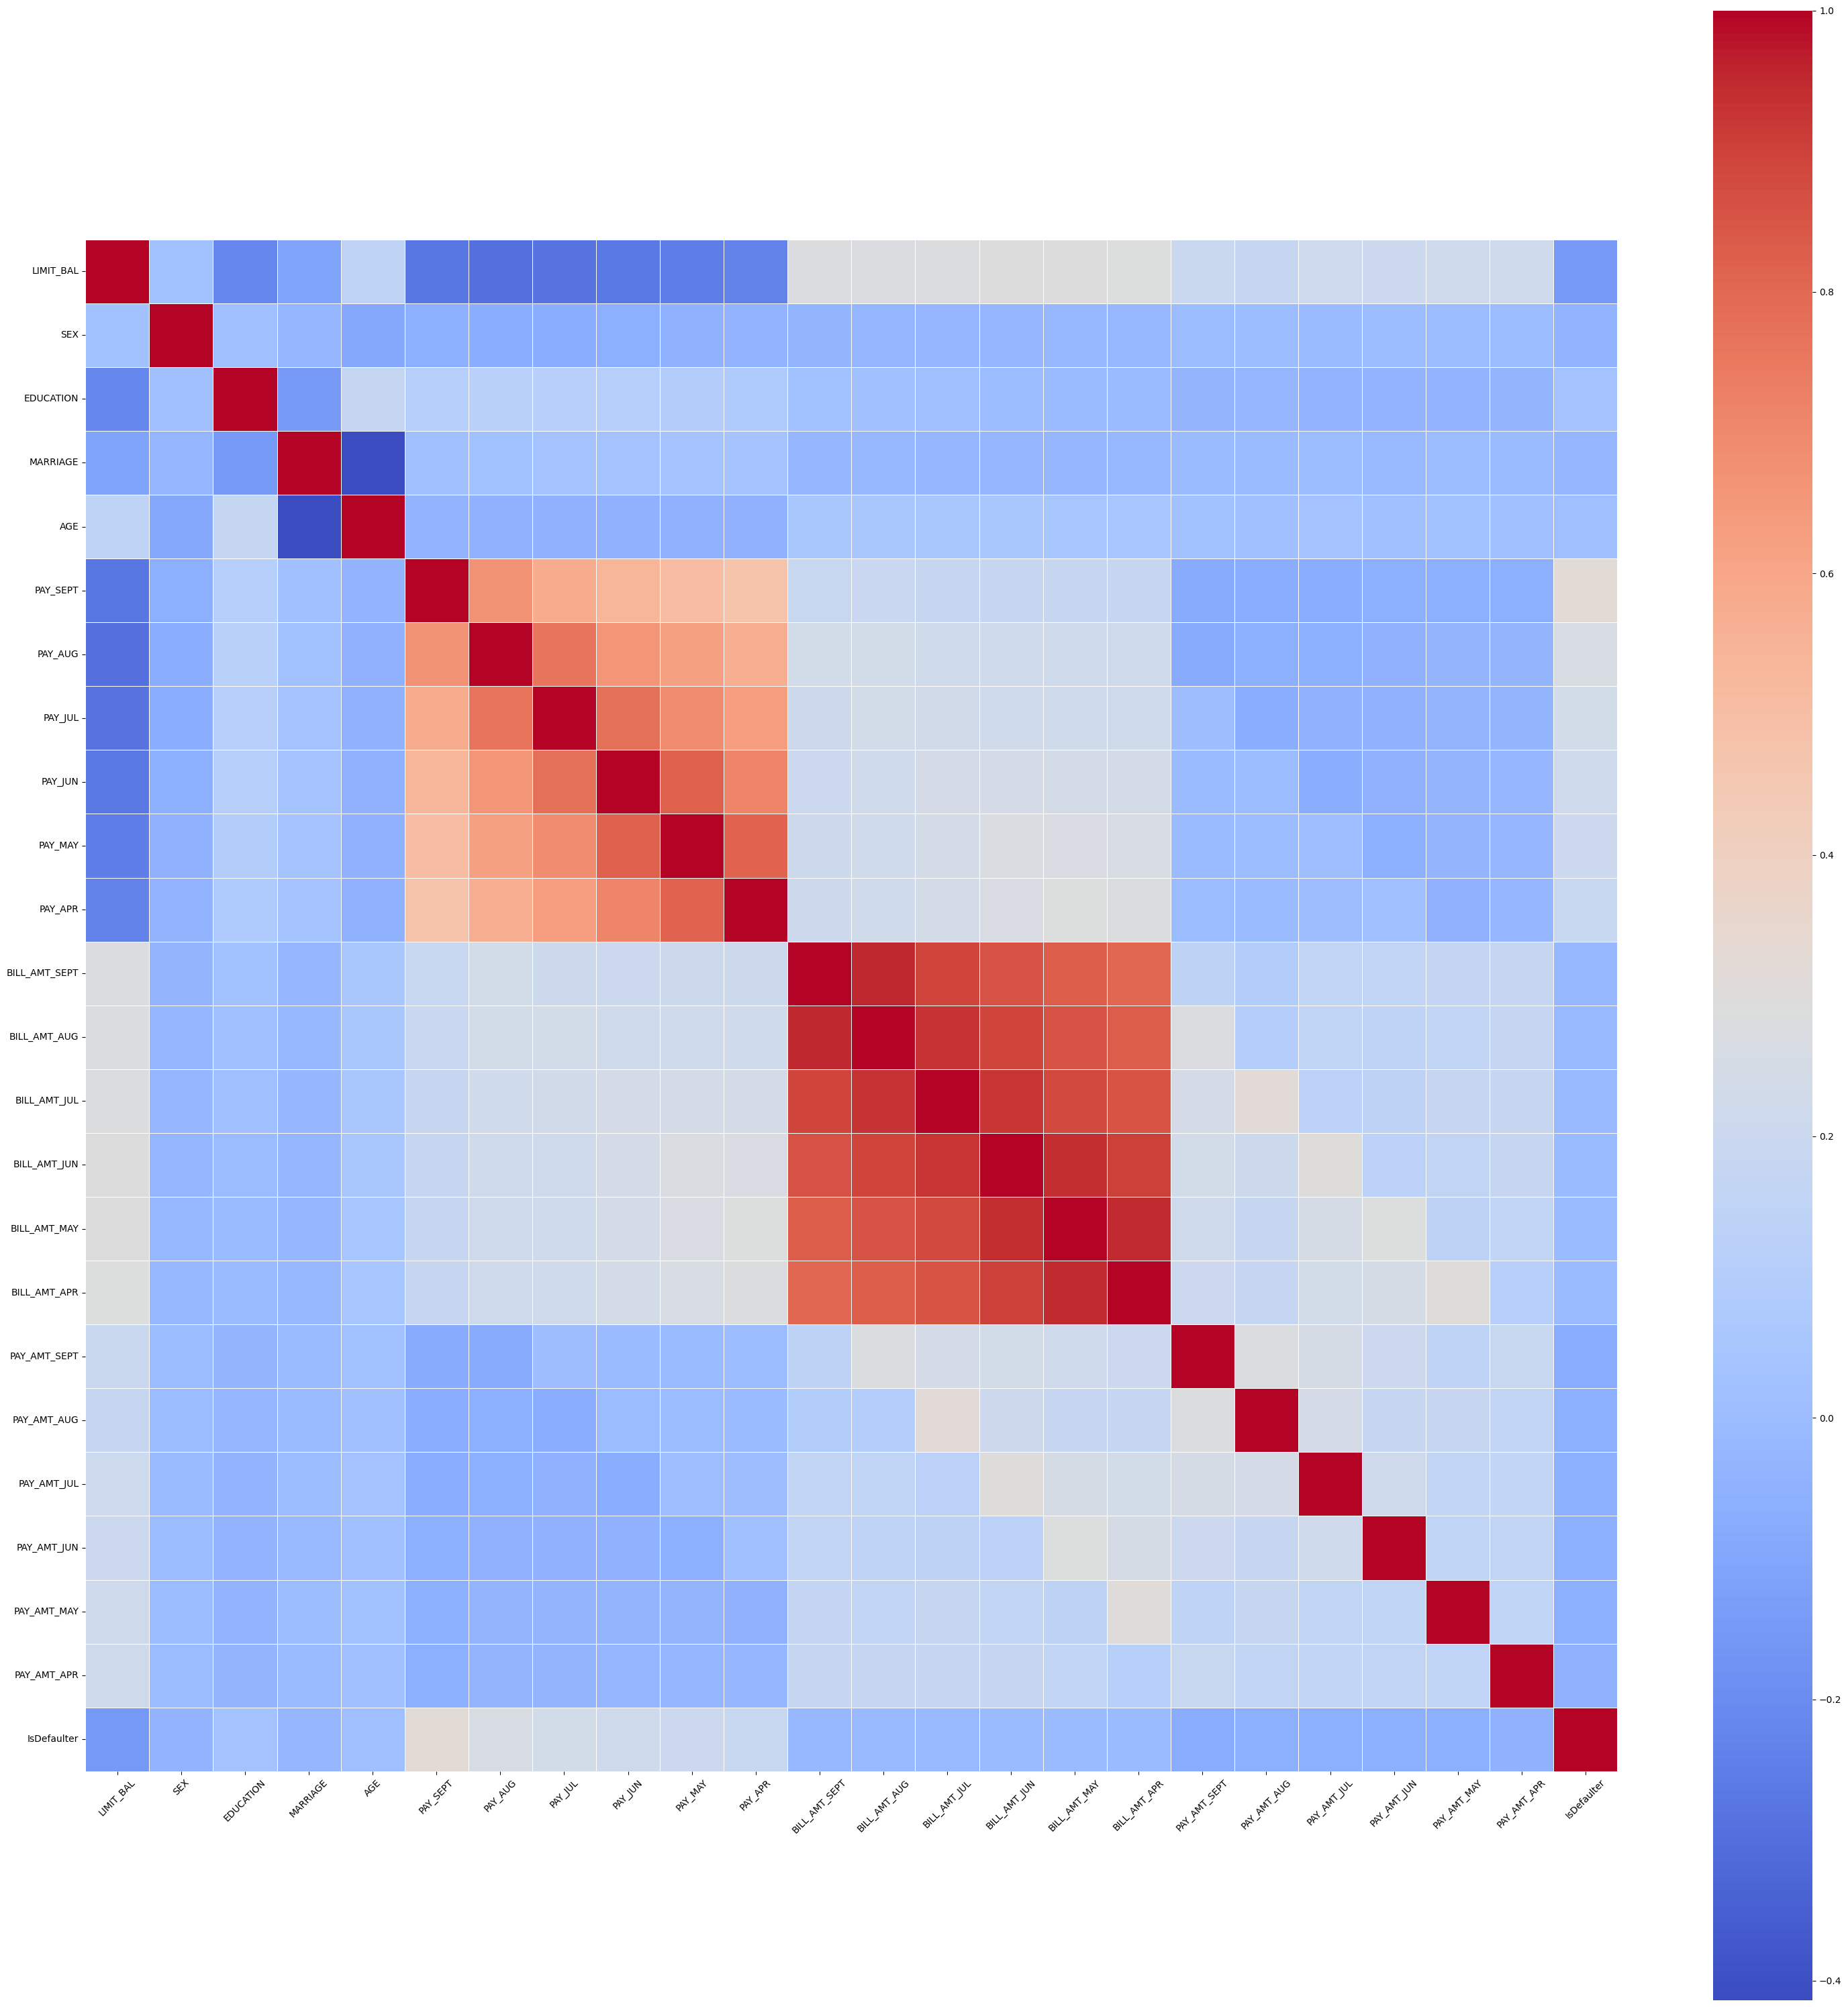

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a larger heatmap
plt.figure(figsize=(30, 30))

# Generate the heatmap for correlation without annotation
heatmap = sns.heatmap(customer_data.corr(), cmap='coolwarm', annot=False, linewidths=0.5, square=True)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Ensure that the entire heatmap is visible
plt.tight_layout()

# Save the heatmap as an image
plt.savefig('correlation_heatmap.png')

# Display the heatmap
plt.show()


## Q-Q plot for each column 

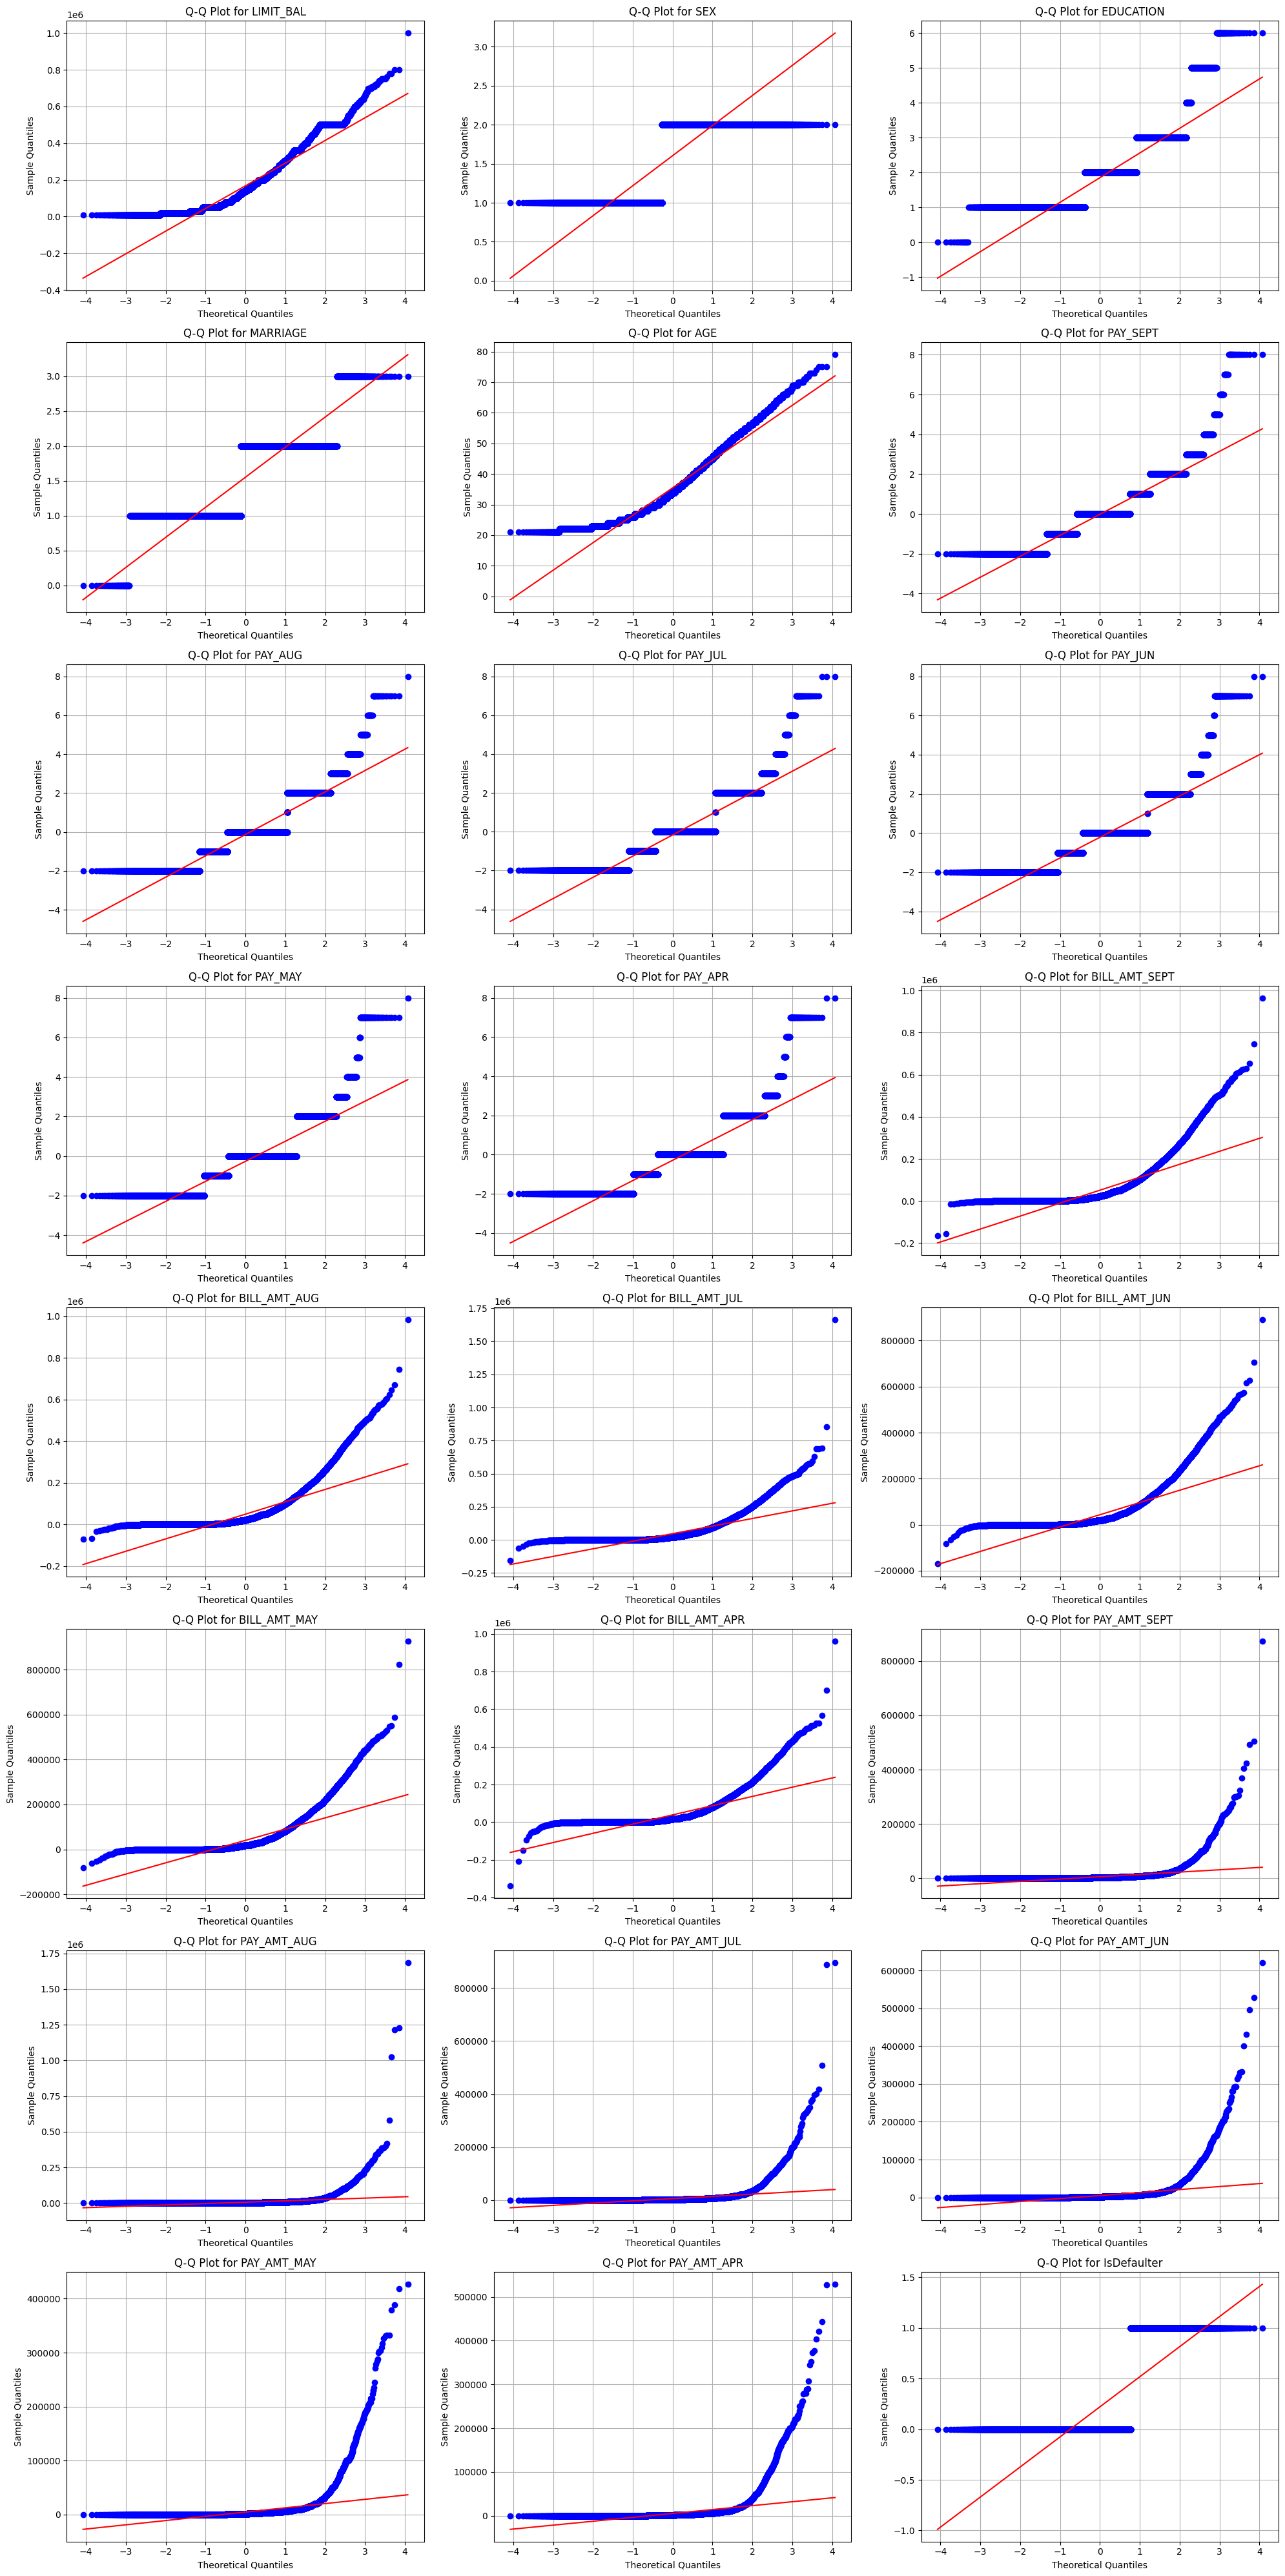

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib.gridspec import GridSpec

# Determine the number of rows and columns for subplots
n_cols = 3
n_rows = (len(customer_data.columns) + 2) // n_cols  # Add 2 to ensure enough rows for the plots

# Create a figure and a GridSpec
fig = plt.figure(figsize=(20, 40))
gs = GridSpec(n_rows, n_cols)

# Flatten the axes into a 1D array for easy iteration
axes = [plt.subplot(gs[i]) for i in range(len(customer_data.columns))]

# Loop through each column and create Q-Q plots
for i, col in enumerate(customer_data.columns):
    ax = axes[i]
    stats.probplot(customer_data[col], dist="norm", plot=ax)
    ax.set_title(f"Q-Q Plot for {col}")
    ax.set_xlabel("Theoretical Quantiles")
    ax.set_ylabel("Sample Quantiles")
    ax.grid(True)

# Remove any empty subplots
for i in range(len(customer_data.columns), n_rows * n_cols):
    fig.delaxes(axes[i])

# Adjust the layout
plt.tight_layout()

# Save the entire grid of Q-Q plots as an image
plt.savefig('qq_plots_combined.png')

# Show the grid of Q-Q plots
plt.show()


### Pairplot of selected columns with color-coding for 'IsDefaulter' 

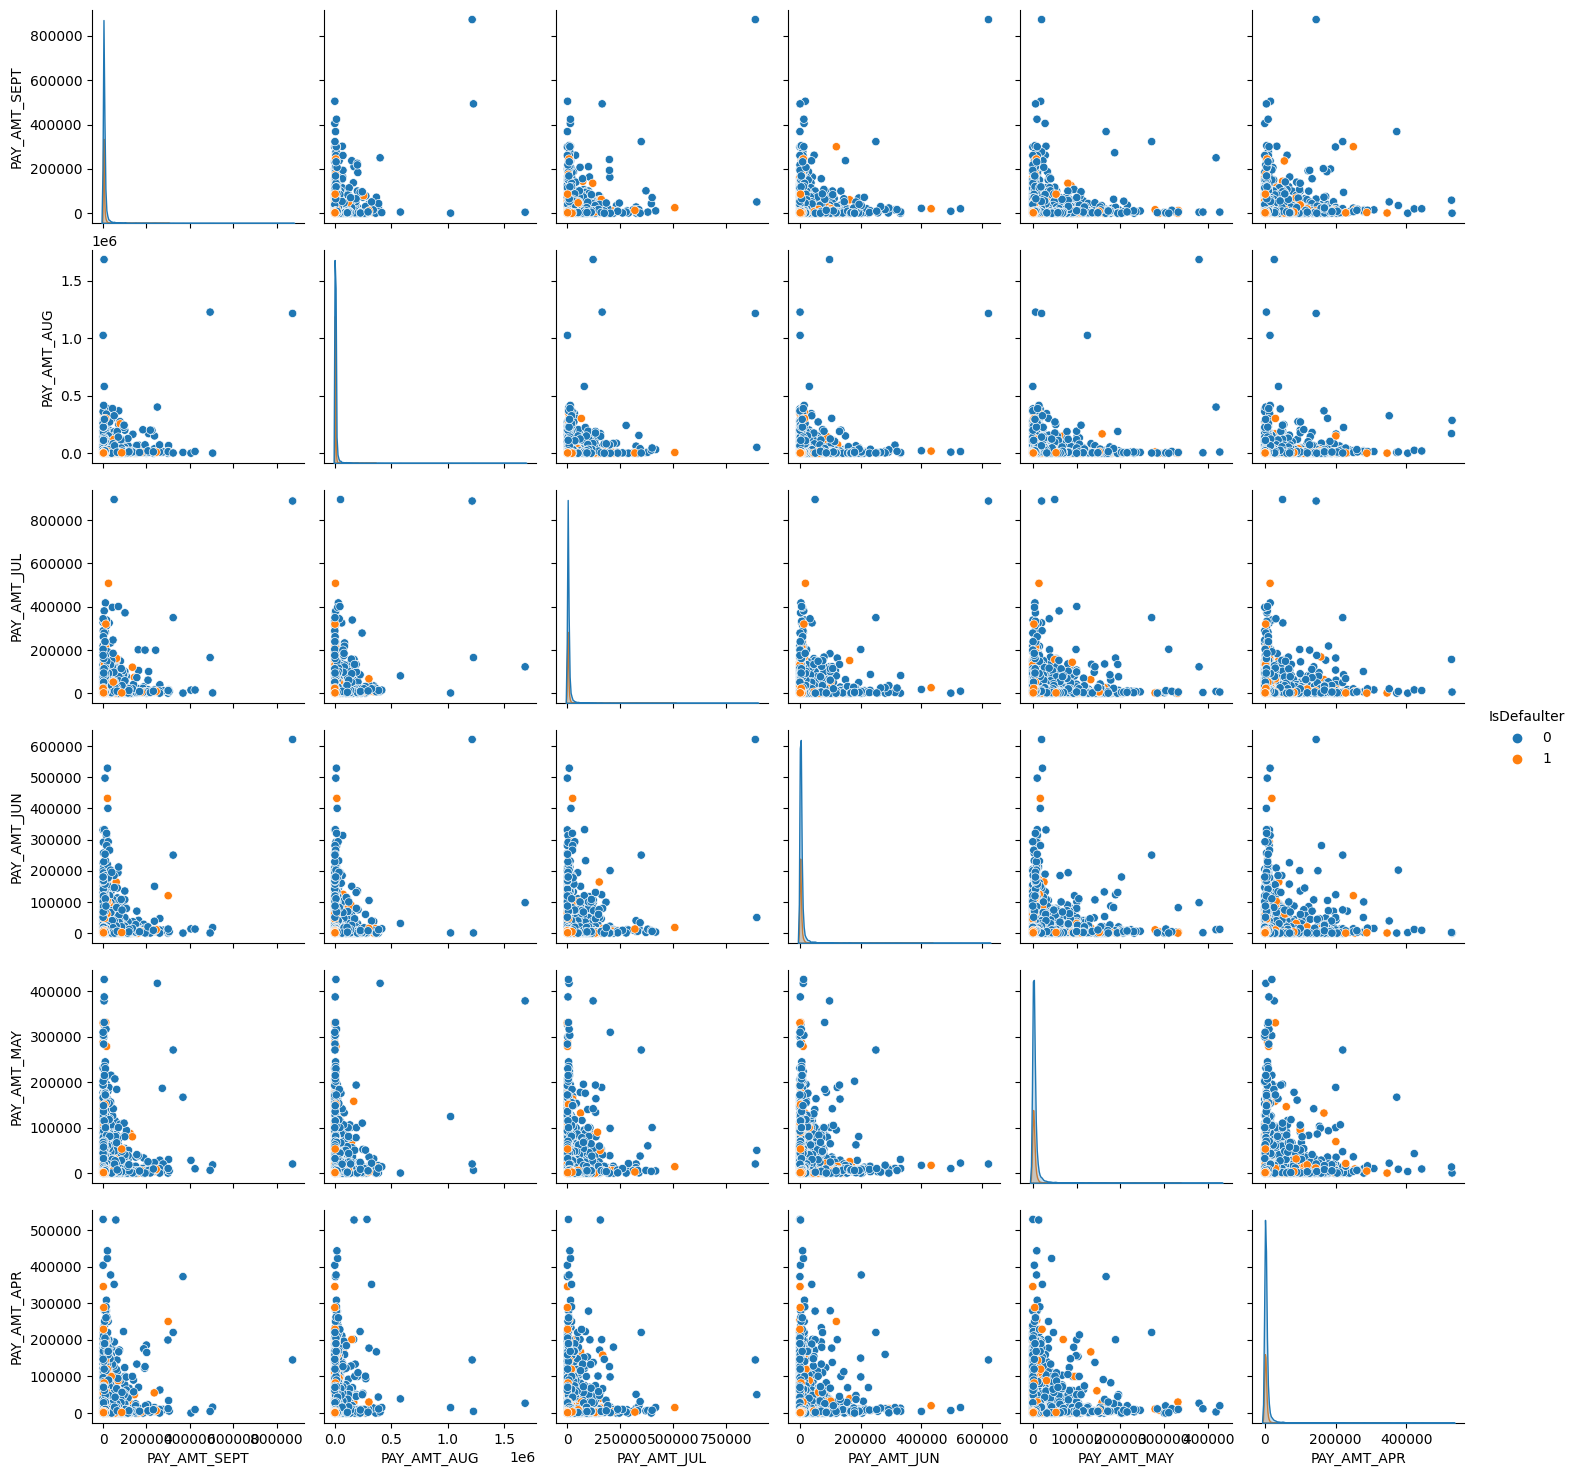

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Subset your data
pay_amnt_df = customer_data[['PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL', 'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR', 'IsDefaulter']]

# Create the pairplot with hue
pairplot = sns.pairplot(data=pay_amnt_df, hue='IsDefaulter')

# Export the pairplot as an image
pairplot.savefig('pairplot.png')

# Display the pairplot
plt.show()


# Feature Engineering

### Calculate 'Payement_Value' as the sum of monthly payment amounts and 'Dues' as the outstanding dues by subtracting payments from bills. 

In [20]:
customer_data['Payement_Value'] = customer_data['PAY_SEPT'] + customer_data['PAY_AUG'] + customer_data['PAY_JUL'] + customer_data['PAY_JUN'] + customer_data['PAY_MAY'] + customer_data['PAY_APR']
customer_data['Dues'] = (customer_data['BILL_AMT_APR']+customer_data['BILL_AMT_MAY']+customer_data['BILL_AMT_JUN']+customer_data['BILL_AMT_JUL']+customer_data['BILL_AMT_SEPT'])-(customer_data['PAY_AMT_APR']+customer_data['PAY_AMT_MAY']+customer_data['PAY_AMT_JUN']+customer_data['PAY_AMT_JUL']+customer_data['PAY_AMT_AUG']+customer_data['PAY_AMT_SEPT'])

In [21]:
customer_data.head(2)

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_SEPT  PAY_AUG  PAY_JUL  \
0    20000.0    2          2         1   24         2        2       -1   
1   120000.0    2          2         2   26        -1        2        0   

   PAY_JUN  PAY_MAY  ...  BILL_AMT_APR  PAY_AMT_SEPT  PAY_AMT_AUG  \
0       -1       -2  ...           0.0           0.0        689.0   
1        0        0  ...        3261.0           0.0       1000.0   

   PAY_AMT_JUL  PAY_AMT_JUN  PAY_AMT_MAY  PAY_AMT_APR  IsDefaulter  \
0          0.0          0.0          0.0          0.0            1   
1       1000.0       1000.0          0.0       2000.0            1   

   Payement_Value     Dues  
0              -2   3913.0  
1               3  10352.0  

[2 rows x 26 columns]

### Create a composite figure with two subplots for boxplots of 'Dues' and 'Payment Value' grouped by 'IsDefaulter'.

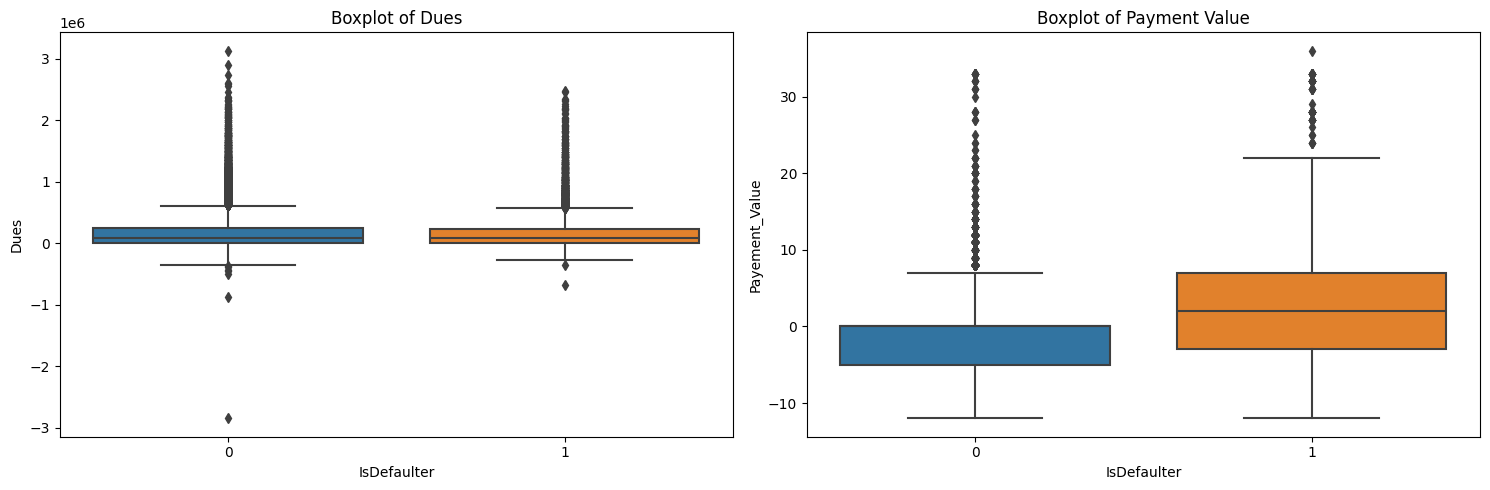

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots with a composite figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# First boxplot
sns.boxplot(data=customer_data, x='IsDefaulter', y='Dues', ax=ax1)
ax1.set_title('Boxplot of Dues')

# Second boxplot
sns.boxplot(data=customer_data, x='IsDefaulter', y='Payement_Value', ax=ax2)
ax2.set_title('Boxplot of Payment Value')

# Adjust layout
plt.tight_layout()

# Save the composite figure as a single image
fig.savefig('combined_boxplots.png')

# Show the figure
plt.show()


### Replace numerical codes with corresponding categorical labels for 'SEX', 'EDUCATION', and 'MARRIAGE'.

In [23]:
customer_data.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'}, 'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others', 5 : 'others', 6 : 'others', 0 : 'others'}, 'MARRIAGE' : {1 : 'married', 2 : 'single', 3 : 'others', 0 : 'others'}}, inplace = True)

In [24]:
customer_data.head(2)

LIMIT_BAL     SEX   EDUCATION MARRIAGE  AGE  PAY_SEPT  PAY_AUG  PAY_JUL  \
0    20000.0  FEMALE  university  married   24         2        2       -1   
1   120000.0  FEMALE  university   single   26        -1        2        0   

   PAY_JUN  PAY_MAY  ...  BILL_AMT_APR  PAY_AMT_SEPT  PAY_AMT_AUG  \
0       -1       -2  ...           0.0           0.0        689.0   
1        0        0  ...        3261.0           0.0       1000.0   

   PAY_AMT_JUL  PAY_AMT_JUN  PAY_AMT_MAY  PAY_AMT_APR  IsDefaulter  \
0          0.0          0.0          0.0          0.0            1   
1       1000.0       1000.0          0.0       2000.0            1   

   Payement_Value     Dues  
0              -2   3913.0  
1               3  10352.0  

[2 rows x 26 columns]

# One Hot Encoding

### Perform one-hot encoding for 'EDUCATION' and 'MARRIAGE' columns, and then drop the 'EDUCATION_others' and 'MARRIAGE_others' columns. Also, label encode 'SEX' column.

In [25]:
customer_data = pd.get_dummies(customer_data,columns=['EDUCATION','MARRIAGE'])
customer_data.drop(['EDUCATION_others','MARRIAGE_others'],axis = 1, inplace = True)
# LABEL ENCODING FOR SEX
encoders_nums = {
                 "SEX":{"FEMALE": 0, "MALE": 1}
}
customer_data = customer_data.replace(encoders_nums)

### Perform one-hot encoding for payment columns, and convert boolean columns to integers.

In [26]:
customer_data = pd.get_dummies(customer_data, columns = ['PAY_SEPT','PAY_AUG','PAY_JUL','PAY_JUN','PAY_MAY','PAY_APR'], drop_first = True )
# Iterate through the columns
for column in customer_data.columns:
    if customer_data[column].dtype == bool:
        customer_data[column] = customer_data[column].astype(int)


In [27]:
customer_data.drop(columns=['Payement_Value', 'Dues'], inplace=True)

In [28]:
customer_data.head(5)

LIMIT_BAL  SEX  AGE  BILL_AMT_SEPT  BILL_AMT_AUG  BILL_AMT_JUL  \
0    20000.0    0   24         3913.0        3102.0         689.0   
1   120000.0    0   26         2682.0        1725.0        2682.0   
2    90000.0    0   34        29239.0       14027.0       13559.0   
3    50000.0    0   37        46990.0       48233.0       49291.0   
4    50000.0    1   57         8617.0        5670.0       35835.0   

   BILL_AMT_JUN  BILL_AMT_MAY  BILL_AMT_APR  PAY_AMT_SEPT  ...  PAY_MAY_8  \
0           0.0           0.0           0.0           0.0  ...          0   
1        3272.0        3455.0        3261.0           0.0  ...          0   
2       14331.0       14948.0       15549.0        1518.0  ...          0   
3       28314.0       28959.0       29547.0        2000.0  ...          0   
4       20940.0       19146.0       19131.0        2000.0  ...          0   

   PAY_APR_-1  PAY_APR_0  PAY_APR_2  PAY_APR_3  PAY_APR_4  PAY_APR_5  \
0           0          0          0          0          0          0   
1           0          0          1          0          0          0   
2           0          1          0          0          0          0   
3           0          1          0          0          0          0   
4           0          1          0          0          0          0   

   PAY_APR_6  PAY_APR_7  PAY_APR_8  
0          0          0          0  
1          0          0          0  
2          0          0          0  
3          0          0          0  
4          0          0          0  

[5 rows x 79 columns]

# Model Building

In [29]:
# Separate the 'cluster' column as y (target variable)
y = customer_data['IsDefaulter']

# Remove the 'cluster' column from the original dataset to create X (features)
X = customer_data.drop(columns=['IsDefaulter'])

### Scale the features and convert the data to a DataFrame with specified column names.

In [30]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Initialize the Min-Max scaler
scaler = MinMaxScaler()

# Fit and transform your data
X = scaler.fit_transform(X)

# Replace 'feature_names' with your actual column names
column_names = ['LIMIT_BAL', 'SEX', 'AGE', 'BILL_AMT_SEPT', 'BILL_AMT_AUG',
       'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY', 'BILL_AMT_APR',
       'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL', 'PAY_AMT_JUN',
       'PAY_AMT_MAY', 'PAY_AMT_APR',
       'EDUCATION_graduate school', 'EDUCATION_high school',
       'EDUCATION_university', 'MARRIAGE_married', 'MARRIAGE_single',
       'PAY_SEPT_-1', 'PAY_SEPT_0', 'PAY_SEPT_1', 'PAY_SEPT_2', 'PAY_SEPT_3',
       'PAY_SEPT_4', 'PAY_SEPT_5', 'PAY_SEPT_6', 'PAY_SEPT_7', 'PAY_SEPT_8',
       'PAY_AUG_-1', 'PAY_AUG_0', 'PAY_AUG_1', 'PAY_AUG_2', 'PAY_AUG_3',
       'PAY_AUG_4', 'PAY_AUG_5', 'PAY_AUG_6', 'PAY_AUG_7', 'PAY_AUG_8',
       'PAY_JUL_-1', 'PAY_JUL_0', 'PAY_JUL_1', 'PAY_JUL_2', 'PAY_JUL_3',
       'PAY_JUL_4', 'PAY_JUL_5', 'PAY_JUL_6', 'PAY_JUL_7', 'PAY_JUL_8',
       'PAY_JUN_-1', 'PAY_JUN_0', 'PAY_JUN_1', 'PAY_JUN_2', 'PAY_JUN_3',
       'PAY_JUN_4', 'PAY_JUN_5', 'PAY_JUN_6', 'PAY_JUN_7', 'PAY_JUN_8',
       'PAY_MAY_-1', 'PAY_MAY_0', 'PAY_MAY_2', 'PAY_MAY_3', 'PAY_MAY_4',
       'PAY_MAY_5', 'PAY_MAY_6', 'PAY_MAY_7', 'PAY_MAY_8', 'PAY_APR_-1',
       'PAY_APR_0', 'PAY_APR_2', 'PAY_APR_3', 'PAY_APR_4', 'PAY_APR_5',
       'PAY_APR_6', 'PAY_APR_7', 'PAY_APR_8']

# Convert the scaled data (NumPy array) into a DataFrame
X = pd.DataFrame(X, columns=column_names)

### Split the data, import evaluation metrics, and create an empty results DataFrame.

In [31]:
# Importing train - test split , K-fold Cross validation and accuracy score and classification report 

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize an empty DataFrame to store the results
result_df = pd.DataFrame(columns=["Model", "Accuracy"])

In [32]:
from sklearn.linear_model import LogisticRegression

# Train and evaluate the first model (Logistic Regression)
model_name = "Logistic Regression"

# Train a logistic regression classifier
log_classifier = LogisticRegression()
log_classifier.fit(X_train, y_train)

# Predict sentiment on the test data
y_pred = log_classifier.predict(X_test)

# Evaluate the model
accuracy1 = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy1:.2f}")

classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

# Add the results to the DataFrame
result_df.loc[len(result_df)] = [model_name, accuracy1]

Accuracy: 0.82
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.67      0.34      0.45      1320

    accuracy                           0.82      5993
   macro avg       0.75      0.65      0.67      5993
weighted avg       0.80      0.82      0.79      5993



In [33]:
from sklearn.tree import DecisionTreeClassifier

# Train and evaluate the first model (Logistic Regression)
model_name = "Decision Tree Classifier"

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
dt_classifier.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
accuracy2 = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy2)
print("Classification Report:")
print(classification_rep)

# Add the results to the DataFrame
result_df.loc[len(result_df)] = [model_name, accuracy2]

Accuracy: 0.7218421491740363
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      4673
           1       0.38      0.40      0.39      1320

    accuracy                           0.72      5993
   macro avg       0.60      0.61      0.60      5993
weighted avg       0.73      0.72      0.72      5993



In [34]:
from sklearn.ensemble import RandomForestClassifier

# Train and evaluate the first model (Logistic Regression)
model_name = "Random Forest Classifier"

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy3 = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy3)
print("Classification Report:")
print(classification_rep)

# Add the results to the DataFrame
result_df.loc[len(result_df)] = [model_name, accuracy3]

Accuracy: 0.8104455197730686
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4673
           1       0.63      0.34      0.44      1320

    accuracy                           0.81      5993
   macro avg       0.73      0.64      0.66      5993
weighted avg       0.79      0.81      0.79      5993



In [35]:
from sklearn.svm import SVC

# Train and evaluate the first model (Logistic Regression)
model_name = "SVC"

# Initialize an SVM classifier (SVC)
classifier = SVC(kernel='sigmoid', C=1)

# Train the SVM classifier
classifier.fit(X_train, y_train)

# Predict sentiment on the test data
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy4 = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy4)
print("Classification Report:")
print(classification_rep)

# Add the results to the DataFrame
result_df.loc[len(result_df)] = [model_name, accuracy4]

Accuracy: 0.7335224428499917
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.84      0.83      4673
           1       0.39      0.36      0.37      1320

    accuracy                           0.73      5993
   macro avg       0.61      0.60      0.60      5993
weighted avg       0.73      0.73      0.73      5993



In [36]:
from sklearn.naive_bayes import MultinomialNB

# Train and evaluate the first model (Logistic Regression)
model_name = "Multinomial Naive Bayes"

# Train a Multinomial Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

# Predict sentiment on the test data
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy5 = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy5)
print("Classification Report:")
print(classification_rep)

# Add the results to the DataFrame
result_df.loc[len(result_df)] = [model_name, accuracy5]

Accuracy: 0.8077757383614217
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.93      0.88      4673
           1       0.60      0.38      0.47      1320

    accuracy                           0.81      5993
   macro avg       0.72      0.66      0.67      5993
weighted avg       0.79      0.81      0.79      5993



In [37]:
from sklearn.naive_bayes import GaussianNB 

# Train and evaluate the first model (Logistic Regression)
model_name = "Gaussian Naive Bayes"

# Train a Multinomial Naive Bayes classifier
classifier_mb = GaussianNB()
classifier_mb.fit(X_train, y_train)

# Predict sentiment on the test data
y_pred = classifier_mb.predict(X_test)

# Evaluate the model
accuracy6 = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy6)
print("Classification Report:")
print(classification_rep)

# Add the results to the DataFrame
result_df.loc[len(result_df)] = [model_name, accuracy6]

Accuracy: 0.7897547138328049
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.98      0.88      4673
           1       0.64      0.11      0.18      1320

    accuracy                           0.79      5993
   macro avg       0.72      0.54      0.53      5993
weighted avg       0.76      0.79      0.73      5993



In [38]:
import xgboost as xgb

# Train and evaluate the first model (Logistic Regression)
model_name = "XGBM"

# Create an XGBoost classifier for classification
clf = xgb.XGBClassifier()  # For multi-class classification

# Fit the model on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model's accuracy
accuracy7 = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy7:.2f}")

# Optionally, print a classification report
print(classification_report(y_test, y_pred))

# Add the results to the DataFrame
result_df.loc[len(result_df)] = [model_name, accuracy7]

Accuracy: 0.81
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4673
           1       0.64      0.35      0.45      1320

    accuracy                           0.81      5993
   macro avg       0.74      0.65      0.67      5993
weighted avg       0.79      0.81      0.79      5993



In [39]:
import lightgbm as lgb

model_name = "LGBM"

# Define the hyperparameters for the LightGBM model for binary classification
params = {
    'objective': 'binary',  # Binary classification
    'boosting_type': 'gbdt',
    'metric': 'binary_logloss',  # Logarithmic loss for binary classification
    # Add other hyperparameters as needed
}

# Create a LightGBM dataset for training
train_data = lgb.Dataset(X_train, label=y_train)

# Train the LightGBM model
num_round = 100  # Number of boosting rounds (you can adjust this)
bst = lgb.train(params, train_data, num_round)

# Predict on the test set
y_pred_prob = bst.predict(X_test)
y_pred_binary = [1 if p >= 0.5 else 0 for p in y_pred_prob]

# Calculate accuracy on the test set
accuracy8 = accuracy_score(y_test, y_pred_binary)
print("Test Accuracy:", accuracy8)

# Add the results to the DataFrame
result_df.loc[len(result_df)] = [model_name, accuracy8]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 5310, number of negative: 18662
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001885 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3273
[LightGBM] [Info] Number of data points in the train set: 23972, number of used features: 57
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.221508 -> initscore=-1.256898
[LightGBM] [Info] Start training from score -1.256898
Test Accuracy: 0.8194560320373769


In [40]:
result_df

Model  Accuracy
0       Logistic Regression  0.817454
1  Decision Tree Classifier  0.721842
2  Random Forest Classifier  0.810446
3                       SVC  0.733522
4   Multinomial Naive Bayes  0.807776
5      Gaussian Naive Bayes  0.789755
6                      XGBM  0.813282
7                      LGBM  0.819456

## Among the models, LGBM has the highest accuracy hence final model is LGBM.

### K - fold Cross validation for model validation.

In [41]:
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import StratifiedKFold, cross_val_score
import lightgbm as lgb

# Initialize StratifiedKFold with k=10 (adjust as needed)
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Define a scoring function (e.g., accuracy) for cross-validation
scoring = make_scorer(accuracy_score)

# Create a LightGBM classifier for classification
clf = lgb.LGBMClassifier()  # You can specify hyperparameters here

# Perform k-fold cross-validation and get accuracy scores
cv_scores = cross_val_score(clf, X, y, cv=kf, scoring=scoring)

# Print the accuracy scores for each fold
for i, score in enumerate(cv_scores, start=1):
    print(f"Fold {i}: {score:.2f}")

# Calculate and print the mean accuracy and standard deviation
mean_accuracy = cv_scores.mean()
std_deviation = cv_scores.std()
print(f"Mean Accuracy: {mean_accuracy:.2f}")
print(f"Standard Deviation: {std_deviation:.2f}")


Fold 1: 0.82
Fold 2: 0.81
Fold 3: 0.82
Fold 4: 0.82
Fold 5: 0.82
Fold 6: 0.82
Fold 7: 0.82
Fold 8: 0.82
Fold 9: 0.80
Fold 10: 0.83
Mean Accuracy: 0.82
Standard Deviation: 0.01


### Using random search CV for best hyper parameters.

In [42]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import accuracy_score


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a LightGBM classifier
lgbm_classifier = LGBMClassifier()

# Define the hyperparameter search space for LightGBM
param_dist_lgbm = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.4],  # Adding 0.3
    'max_depth': [3, 4, 5, 6, 7, 8],  # Adding 7
    'n_estimators': [100, 200, 300, 400, 500]  # Adding 400
}

# Create a RandomizedSearchCV object for LightGBM
random_search_lgbm = RandomizedSearchCV(
    estimator=lgbm_classifier,
    param_distributions=param_dist_lgbm,
    n_iter=50,  # Number of random combinations to try
    scoring='accuracy',
    cv=5,
    n_jobs=-1,  # Use all available CPU cores
    random_state=42
)

# Perform hyperparameter tuning for LightGBM
random_search_lgbm.fit(X_train, y_train)

# Print the best hyperparameters and their corresponding accuracy for LightGBM
best_params_lgbm = random_search_lgbm.best_params_
best_accuracy_lgbm = random_search_lgbm.best_score_
print("Best Hyperparameters (LightGBM):", best_params_lgbm)
print("Best Accuracy (LightGBM):", best_accuracy_lgbm)

# Evaluate the best LightGBM model on the test set
best_model_lgbm = random_search_lgbm.best_estimator_
y_pred_lgbm = best_model_lgbm.predict(X_test)
test_accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
print("Test Accuracy (LightGBM):", test_accuracy_lgbm)

Best Hyperparameters (LightGBM): {'n_estimators': 500, 'max_depth': 8, 'learning_rate': 0.01}
Best Accuracy (LightGBM): 0.8203319234200903
Test Accuracy (LightGBM): 0.8187885866844652


# Final Model

In [43]:
from lightgbm import LGBMClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Define the best hyperparameters obtained from RandomizedSearchCV for LightGBM
best_hyperparameters = {
    'n_estimators': 500,
    'max_depth': 8,
    'learning_rate': 0.01
}

# Create the final LightGBM classifier using the best hyperparameters
final_lgbm_model = LGBMClassifier(**best_hyperparameters)

# Train the final model on the entire training dataset
final_lgbm_model.fit(X_train, y_train)

# Make predictions on the test set using the final model
y_pred_final_lgbm = final_lgbm_model.predict(X_test)

# Evaluate the final model on the test set
final_accuracy_lgbm = accuracy_score(y_test, y_pred_final_lgbm)
print("Final Model Test Accuracy (LightGBM):", final_accuracy_lgbm)

# Add a classification report to evaluate precision, recall, F1-score, and support for each class
classification_rep_lgbm = classification_report(y_test, y_pred_final_lgbm)
print("Classification Report (LightGBM):")
print(classification_rep_lgbm)


Final Model Test Accuracy (LightGBM): 0.8187885866844652
Classification Report (LightGBM):
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.68      0.34      0.45      1320

    accuracy                           0.82      5993
   macro avg       0.76      0.65      0.67      5993
weighted avg       0.80      0.82      0.79      5993



In [44]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import StratifiedKFold, cross_val_score
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score

# Define a scoring function (e.g., accuracy) for cross-validation
scoring = make_scorer(accuracy_score)

# Define the best hyperparameters obtained from RandomizedSearchCV for LightGBM
best_hyperparameters = {
    'n_estimators': 500,
    'max_depth': 8,
    'learning_rate': 0.01
}

# Create the final LightGBM classifier using the best hyperparameters
final_lgbm_model = LGBMClassifier(**best_hyperparameters)

# Initialize StratifiedKFold with k=10 (adjust as needed)
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Perform k-fold cross-validation and get accuracy scores
cv_scores = cross_val_score(final_lgbm_model, X, y, cv=kf, scoring=scoring)

# Print the accuracy scores for each fold
for i, score in enumerate(cv_scores, start=1):
    print(f"Fold {i}: {score:.2f}")

# Calculate and print the mean accuracy and standard deviation
mean_accuracy = cv_scores.mean()
std_deviation = cv_scores.std()
print(f"Mean Accuracy: {mean_accuracy:.2f}")
print(f"Standard Deviation: {std_deviation:.2f}")


Fold 1: 0.82
Fold 2: 0.82
Fold 3: 0.82
Fold 4: 0.82
Fold 5: 0.82
Fold 6: 0.82
Fold 7: 0.82
Fold 8: 0.82
Fold 9: 0.81
Fold 10: 0.83
Mean Accuracy: 0.82
Standard Deviation: 0.01


### Confusion Matrix for the model accuracy

In [45]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred_final_lgbm)
print (confusion_matrix)

[[4458  215]
 [ 871  449]]


### Precision (per class)

In [46]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, cohen_kappa_score, log_loss, roc_auc_score, auc, roc_curve, average_precision_score, precision_recall_curve

# Precision (per class)
precision_per_class = precision_score(y_test, y_pred_final_lgbm, average=None)
print("Precision per class:", precision_per_class)

Precision per class: [0.8365547  0.67620482]


### Recall (per class)

In [47]:
# Recall (per class)
recall_per_class = recall_score(y_test, y_pred_final_lgbm, average=None)
print("Recall per class:", recall_per_class)

Recall per class: [0.95399101 0.34015152]


### F1-Score (per class)

In [48]:
# F1-Score (per class)
f1_score_per_class = f1_score(y_test, y_pred_final_lgbm, average=None)
print("F1-Score per class:", f1_score_per_class)

F1-Score per class: [0.89142172 0.45262097]


### Cohen's Kappa

In [49]:
# Cohen's Kappa
kappa = cohen_kappa_score(y_test, y_pred_final_lgbm)
print("Cohen's Kappa:", kappa)

Cohen's Kappa: 0.35796582708831837


### Train a final LightGBM model with optimized hyperparameters, make predictions, and display predicted probabilities for the test set.

In [50]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Define the best hyperparameters obtained from RandomizedSearchCV for LightGBM
best_hyperparameters = {
    'n_estimators': 500,
    'max_depth': 8,
    'learning_rate': 0.01
}

# Create the final LightGBM classifier using the best hyperparameters
final_lgbm_model = LGBMClassifier(**best_hyperparameters)

# Train the final model on the entire training dataset
final_lgbm_model.fit(X_train, y_train)

# Make predictions (probabilities) on the test set using the final model
y_pred_proba_lgbm = final_lgbm_model.predict_proba(X_test)

# `y_pred_proba_lgbm` will contain the predicted probabilities for each class
print("Predicted Probabilities for Test Set (LightGBM):")
print(y_pred_proba_lgbm)


Predicted Probabilities for Test Set (LightGBM):
[[0.86479596 0.13520404]
 [0.88599669 0.11400331]
 [0.8746157  0.1253843 ]
 ...
 [0.14072258 0.85927742]
 [0.87085469 0.12914531]
 [0.89078213 0.10921787]]


### Calculate and display log loss and ROC-AUC for binary classification using LightGBM predictions.

In [51]:
from sklearn.metrics import log_loss, roc_auc_score

# Log Loss (Cross-Entropy Loss)
logloss = log_loss(y_test, y_pred_proba_lgbm[:, 1])  # Use the predicted probabilities for the positive class
print("Log Loss (Cross-Entropy Loss):", logloss)

# ROC-AUC for binary classification
roc_auc = roc_auc_score(y_test, y_pred_proba_lgbm[:, 1])  # Use the predicted probabilities for the positive class
print("ROC-AUC (Binary Classification):", roc_auc)


Log Loss (Cross-Entropy Loss): 0.427701794216004
ROC-AUC (Binary Classification): 0.7825145581645689


### Calculate and visualize ROC and Precision-Recall curves for a two-class classification using LightGBM predictions.

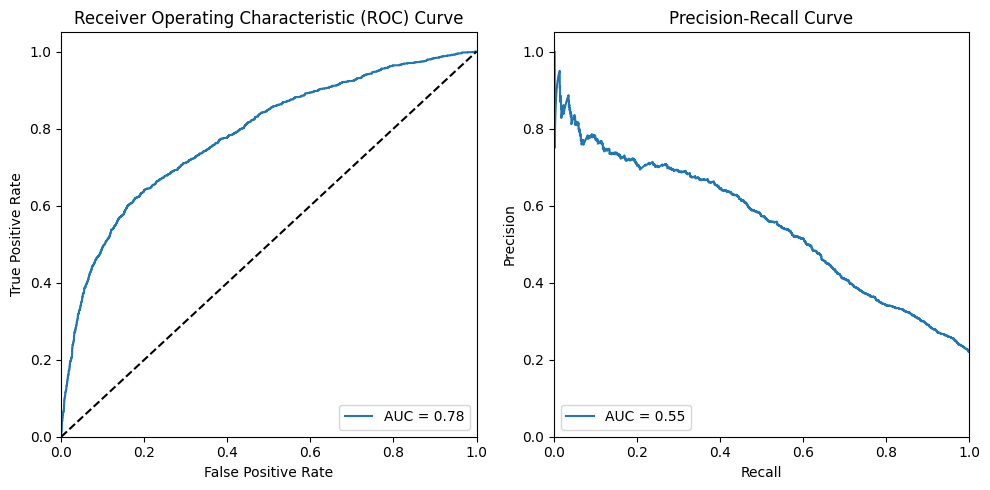

In [52]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve

# Assuming you already have y_test and y_pred_proba_lgbm for a two-class classification problem

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_lgbm[:, 1])  # Use the predicted probabilities for the positive class
roc_auc = auc(fpr, tpr)

# Compute Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba_lgbm[:, 1])  # Use the predicted probabilities for the positive class
pr_auc = auc(recall, precision)

# Plot ROC curve
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)

plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# Plot Precision-Recall curve
plt.subplot(1, 2, 2)

plt.plot(recall, precision, label=f'AUC = {pr_auc:.2f}')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")

plt.tight_layout()

# Save the figure as an image (e.g., PNG)
plt.savefig("roc_pr_curve.png", dpi=300, bbox_inches="tight")

# Show the figure
plt.show()


In [53]:
# Assuming your target variable is in a column named 'target' (adjust as needed)
X1 = customer_data.drop('IsDefaulter', axis=1)  # X contains the features
y1 = customer_data['IsDefaulter']  # y contains the target variable

### Build and evaluate a LightGBM model on the entire dataset using optimized hyperparameters.

In [54]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define the best hyperparameters obtained from RandomizedSearchCV for LightGBM
best_hyperparameters = {
    'n_estimators': 500,
    'max_depth': 8,
    'learning_rate': 0.01
}

# Create the final LightGBM classifier using the best hyperparameters
final_LGBM_model = LGBMClassifier(**best_hyperparameters)

# Train the final model on the whole dataset
final_LGBM_model.fit(X1, y1)  # Use the entire dataset

# Make predictions on the dataset using the final model
y_pred_final_lgbm = final_LGBM_model.predict(X1)

# Evaluate the final model on the dataset
final_accuracy_lgbm = accuracy_score(y1, y_pred_final_lgbm)
print("Final Model Accuracy (LightGBM) on the Whole Dataset:", final_accuracy_lgbm)

# Add a classification report to evaluate precision, recall, F1-score, and support for each class
classification_rep_lgbm = classification_report(y1, y_pred_final_lgbm)
print("Classification Report (LightGBM) on the Whole Dataset:")
print(classification_rep_lgbm)


Final Model Accuracy (LightGBM) on the Whole Dataset: 0.8315701651927249
Classification Report (LightGBM) on the Whole Dataset:
              precision    recall  f1-score   support

           0       0.85      0.96      0.90     23335
           1       0.72      0.39      0.51      6630

    accuracy                           0.83     29965
   macro avg       0.78      0.67      0.70     29965
weighted avg       0.82      0.83      0.81     29965



### Save the trained LightGBM model to a .sav file.

In [55]:
import pickle

# Define the path and filename for saving the model as a .sav file
model_filename = "final_LGBM_model.sav"

# Save the trained LightGBM model to the file
with open(model_filename, 'wb') as model_file:
    pickle.dump(final_LGBM_model, model_file)

print(f"LightGBM model saved as {model_filename}")


LightGBM model saved as final_LGBM_model.sav


In [56]:
X1.columns

Index(['LIMIT_BAL', 'SEX', 'AGE', 'BILL_AMT_SEPT', 'BILL_AMT_AUG',
       'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY', 'BILL_AMT_APR',
       'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL', 'PAY_AMT_JUN',
       'PAY_AMT_MAY', 'PAY_AMT_APR', 'EDUCATION_graduate school',
       'EDUCATION_high school', 'EDUCATION_university', 'MARRIAGE_married',
       'MARRIAGE_single', 'PAY_SEPT_-1', 'PAY_SEPT_0', 'PAY_SEPT_1',
       'PAY_SEPT_2', 'PAY_SEPT_3', 'PAY_SEPT_4', 'PAY_SEPT_5', 'PAY_SEPT_6',
       'PAY_SEPT_7', 'PAY_SEPT_8', 'PAY_AUG_-1', 'PAY_AUG_0', 'PAY_AUG_1',
       'PAY_AUG_2', 'PAY_AUG_3', 'PAY_AUG_4', 'PAY_AUG_5', 'PAY_AUG_6',
       'PAY_AUG_7', 'PAY_AUG_8', 'PAY_JUL_-1', 'PAY_JUL_0', 'PAY_JUL_1',
       'PAY_JUL_2', 'PAY_JUL_3', 'PAY_JUL_4', 'PAY_JUL_5', 'PAY_JUL_6',
       'PAY_JUL_7', 'PAY_JUL_8', 'PAY_JUN_-1', 'PAY_JUN_0', 'PAY_JUN_1',
       'PAY_JUN_2', 'PAY_JUN_3', 'PAY_JUN_4', 'PAY_JUN_5', 'PAY_JUN_6',
       'PAY_JUN_7', 'PAY_JUN_8', 'PAY_MAY_-1', 'PAY_MAY_0', 'PAY_MAY_